# What's new since last year's UGM? 2023 RDKit UGM Edition

Not an exhaustive list, just some examples.
Covers 2022.09, 2023.03, and the forthcoming 2023.09 release.

## Big code changes




### Backwards incompatible changes
(Ongoing)

We've started to gradually make changes to the code that may be either backwards incompatible or may change the default results. These are documented in a section of the release notes and are generally tagged with `Changes Results` in github.

Here are examples from the three releases covered here:

#### 2023.09 (in progress)
```
- The CDXML parser now returns mols with reasonable coordinates and in
the same coordinate axes as the other RDKit file parsers. 
- All methods returning `JSMol` and `JSReaction` objects now return a
`nullptr` (`null` in JS) when faling to generate a valid object, while
previously they were returning objects whose `is_valid()` method would
return `false`. The new implementation avoids the overhead of having to
call `delete()` on invalid objects and was approved in a
[public discussion on the `rdkit-js` GitHub repository](
  https://github.com/rdkit/rdkit-js/discussions/336)
- In JS MinimalLib, `MolIterator` was renamed to `MolList`: since now it
includes `at()`, `append()`, `insert()` and `pop()` methods, `MolIterator`
felt inappropriate. This change should have minimal impact on existing
JS code since so far there was no constructor for this class.
The only place where JS code needs to be updated is when parsing the return
value of `JSMol::get_frags()`: the return value consists of an object with
two keys, `molIterator` and `mappings`. The `molIterator` key has now
been renamed to `molList`.
- The user-configurable `MCSParameters::FinalMatchChecker` function is now
called after the built-in `FinalMatchChecker` function, rather as
alternatively to the built-in `FinalMatchChecker` function. This was a
design flaw which is worth correcting.
- Setting `MCSParameters::Timeout` to 0 means no timeout, rather than 0s
timeout, which is rather pointless as it would cause MCS to be canceled
immediately.
- Result SMARTS strings generated by `FindMCS` when
`MCSParameters::MatchRingFusionStrict` is `true` now include ring membership
queries where appropriate in order to ensure more specific substructure
matches.
- In MCS Verbose statistics, `SingleBondExcluded` was renamed to
`IndividualBondExcluded` to avoid confusion, since single bond has a
different meaning in chemistry.
- The error messages from failed type conversions in calls to `GetProp()` now
differ slightly between compilers. Instead of always including "boost::bad_any
cast", they now need to be matched with the regex `[B,b]ad any[\ ,_]cast`
- The algorithm for perceiving atomic stereochemistry using wedged bonds has 
changed. This will lead to differing results for some ambiguously or badly drawn 
structures.
```

#### 2023.03 
```
- The ring-finding functions will now run even if the molecule already has ring information. Older versions of the RDKit would return whatever ring information was present, even if it had been generated using a different algorithm.
- The ring-finding functions now no longer consider dative bonds as possible ring bonds by default. All of the ring-finding functions have a new optional argument `includeDativeBonds` which can be used to change this behavior
- Generating 2D coordinates no longer has the side effect of running ring finding on molecules.
- The canonical SMILES and CXSMILES generated for molecules with enhanced stereochemistry (stereo groups) is different than in previous releases. The enhanced stereochemistry information and the stereo groups themselves are now canonical. This does *not* affect molecules which do not have enhanced stereo and will not have any effect if you generate non-isomeric SMILES. This change also affects the output of the MolHash and RegistrationHash code when applied to molecules with enhanced stereo.
- The doIsomericSmiles parameter in Java and C# ROMol.MolToSmiles() now defaults to true (previously it was false), thus aligning to the C++ and Python behavior.
- Double bonds which are marked as crossed (i.e. `bond.GetBondDir() == Bond.BondDir.EITHERDOUBLE`) now have their BondStereo set to `Bond.BondStereo.STEREOANY` and the BondDir information removed by default when molecules are parsed or `AssignStereochemistry()` is called with the `cleanIt` argument set to True.
- The conformers generated for molecules with three-coordinate chiral centers will be somewhat different due to the fix for #5883.
- Molecules which come from Mol or SDF files will now always have the "_MolFileChiralFlag" property set to the value of the chiral flag in the CTAB. In previous versions the property was not set if the chiral flag was 0.
```

#### 2022.09 
```
- `GetBestRMS() and CalcRMS()` by default now treat terminal conjugated functional
  groups like carboxylate and nitro symmetrically. For example, the group
  `C(=[O:1])[O-:2]` can match in either orientation. The SMARTS pattern which is
  used to recognize affected groups is:
  `[{atomP};$([{atomP}]-[*]=[{atomP}]),$([{atomP}]=[*]-[{atomP}])]~[*]` where
  `{atomP}` is `O,N;D1`. The previous behavior can be restored using by setting
  the `symmetrizeConjugatedTerminalGroups` argument to false when calling
  `GetBestRMS() and CalcRMS()`
- The following `#defines` are no longer provided in/used by the C++ code or `RDConfig.h`:
  - `BUILD_COORDGEN_SUPPORT`: use `RDK_BUILD_COORDGEN_SUPPORT` instead
  - `RDK_THREADSAFE_SSS`: use `RDK_BUILD_THREADSAFE_SSS` instead
  - `USE_BUILTIN_POPCOUNT`: use `RDK_OPTIMIZE_POPCNT` instead
- The Python function `Chem.GetSSSR()` now returns the SSSR rings found instead
  of just returning the count of rings. This is consistent with
  `Chem.GetSymmSSSR()` and more useful.
- The SMILES parser will ignore the value of
  `SmilesParserParams.useLegacyStereo` unless it is set to `false`. See the
  deprecation note about `useLegacyStereo` below for more information.
- The CFFI function `set_2d_coords_aligned()` now takes an additional `char **match_json`
  parameter; if `match_json` is not not `NULL`, `*match_json` will point to a
  JSON string containing the atoms and bonds which are part of the match.
  It is up to the user to free this string.
- The aliphatic imine rule used in tautomer enumeration has been changed to more
  closely match the definition in the original paper.
```






# JavaScript wrappers

We've continued to extend MinimalLib and add functionality to the wrappers.

## NPM packaging

Michel Moreau has set up the infrastructure to enable NPM packaging and distribution of the JS wrappers: https://www.npmjs.com/package/@rdkit/rdkit

This includes additional documentation and easy installation.


# New things in Contrib


# MinimalLib improvements
(ongoing)

These affect the JavaScript wrappers as well as the CFFI interface

- Ability to capture log information
- Partial sanitization options
- Optional support for MCS, Chemical reactions, and SubstructLibrary in JS

# PostgreSQL Cartridge improvements
(ongoing)

- Support for using Beilstein generics (Contributor: Jonathan Bisson)
- Support generalized substructure search

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
%load_ext sql

10 rows affected.


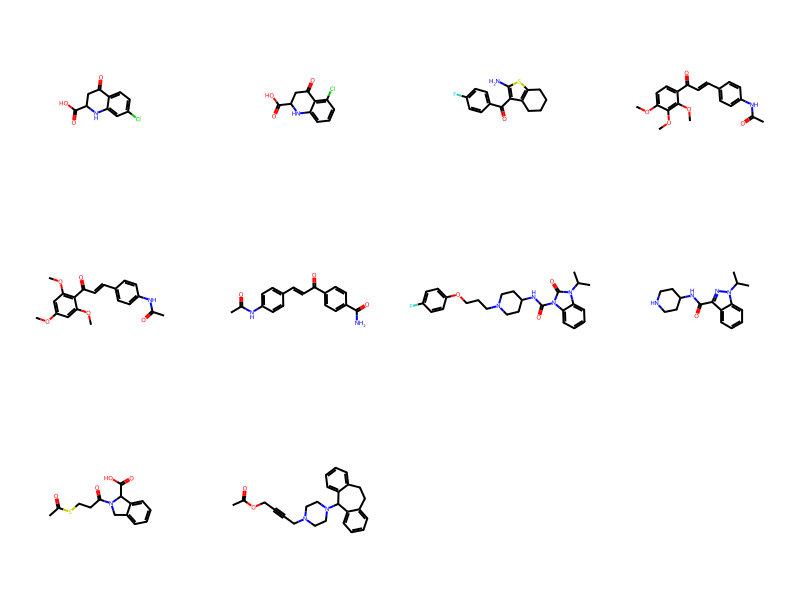

In [2]:
d = %sql postgresql://localhost/chembl_31 \
  select * from rdk.million_mols where m @>> mol_adjust_query_properties('O=C(-*)(-*) |$;;ARY_p;ARY_p$|'::mol, \
                        '{"adjustDegree": false, "makeDummiesQueries": true}')\
            order by molregno asc limit 10;
ms = [Chem.MolFromSmiles(y) for x,y in d]
Draw.MolsToGridImage(ms,molsPerRow=4)

In [3]:
%sql postgresql://localhost/chembl_31 \
  select  'CC(=O)C'::mol @>> mol_adjust_query_properties('O=C(-*)(-*) |$;;ARY_p;ARY_p$|'::mol, \
                        '{"setGenericQueryFromProperties": true, "adjustDegree": false}');

1 rows affected.


?column?
False


10 rows affected.


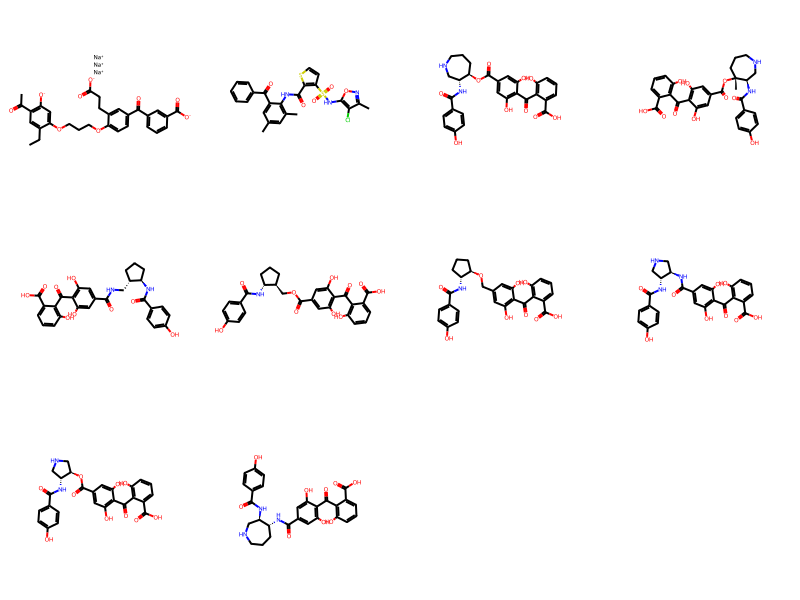

In [4]:
d = %sql postgresql://localhost/chembl_31 \
  select * from rdk.million_mols where m @>> mol_adjust_query_properties('O=C(-*)(-*) |$;;ARY_p;ARY_p$|'::mol, \
                        '{"setGenericQueryFromProperties": true, "adjustDegree": false, "makeDummiesQueries": true}')\
            order by molregno asc limit 10;
ms = [Chem.MolFromSmiles(y) for x,y in d]
Draw.MolsToGridImage(ms,molsPerRow=4)

Generalized substructure search

In [5]:
mb = '''
     RDKit          2D

  0  0  0  0  0  0  0  0  0  0999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 7 7 1 0 0
M  V30 BEGIN ATOM
M  V30 1 C 1.208608 -2.457143 0.000000 0
M  V30 2 C 2.445787 -1.742857 0.000000 0
M  V30 3 C 2.445787 -0.314286 0.000000 0
M  V30 4 N 1.208608 0.400000 0.000000 0
M  V30 5 C -0.028571 -0.314286 0.000000 0
M  V30 6 C -0.028571 -1.742857 0.000000 0
M  V30 7 O -1.265751 0.400000 0.000000 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 1 2 3
M  V30 3 1 3 4
M  V30 4 2 4 5
M  V30 5 1 5 6
M  V30 6 1 6 1
M  V30 7 1 5 7
M  V30 END BOND
M  V30 BEGIN SGROUP
M  V30 1 DAT 0 ATOMS=(1 7) FIELDDISP="    0.0000    0.0000    DR    ALL  0 0" -
M  V30 QUERYTYPE=SMARTSQ QUERYOP== FIELDDATA="[#8&X1]"
M  V30 END SGROUP
M  V30 END CTAB
M  END
$$$$
'''

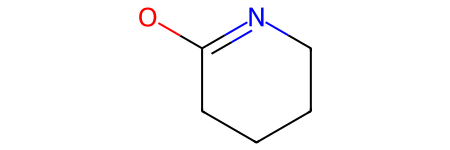

In [6]:
m = Chem.MolFromMolBlock(mb)
m

In [7]:
Chem.MolToSmarts(m)

'[#6]1-[#6]-[#6]-[#7]=[#6](-[#6]-1)-[#8&X1]'

In [8]:
d = %sql postgresql://localhost/chembl_31 \
  select * from rdk.million_mols where m @> mol_from_ctab(:mb)\
            order by molregno asc limit 10;
if not len(d):
    raise ValueError('no matches!')
ms = [Chem.MolFromSmiles(y) for x,y in d]
Draw.MolsToGridImage(ms,molsPerRow=4)


0 rows affected.


ValueError: no matches!

10 rows affected.


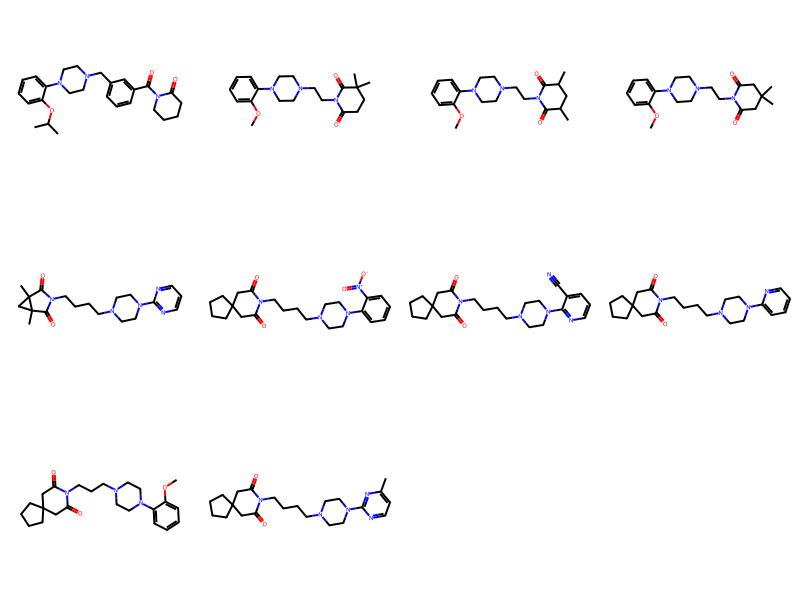

In [9]:
d = %sql postgresql://localhost/chembl_31 \
  select * from rdk.million_mols where m @> mol_to_xqmol(mol_from_ctab(:mb))\
            order by molregno asc limit 10;
ms = [Chem.MolFromSmiles(y) for x,y in d]
Draw.MolsToGridImage(ms,molsPerRow=4)


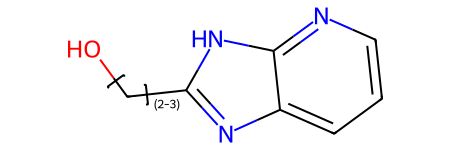

In [10]:
qry = Chem.MolFromSmiles('OCc1nc2cccnc2[nH]1 |LN:1:2.3|')
qry

6 rows affected.


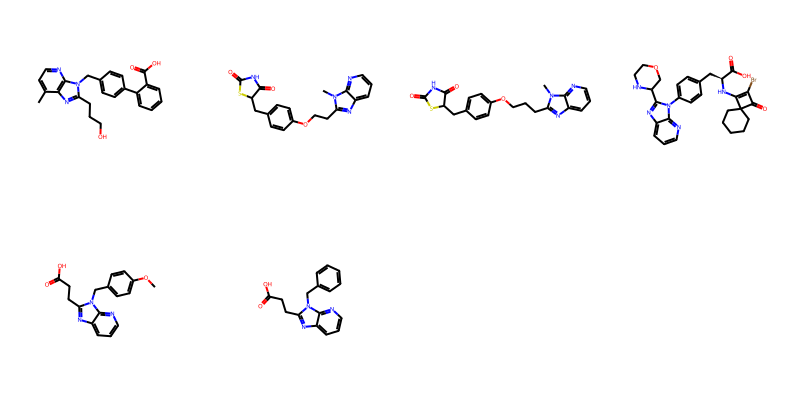

In [11]:
d = %sql postgresql://localhost/chembl_31 \
  select * from rdk.million_mols where m @> mol_to_xqmol('OCc1nc2cccnc2[nH]1 |LN:1:2.3|')\
            limit 10;
ms = [Chem.MolFromSmiles(y) for x,y in d]
Draw.MolsToGridImage(ms,molsPerRow=4)


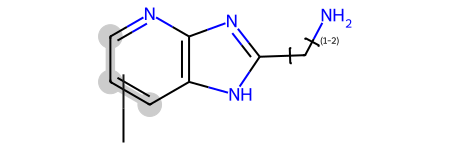

In [12]:
mb = '''qry 
  Mrv2305 09052314502D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 13 13 0 0 0
M  V30 BEGIN ATOM
M  V30 1 N -4.75 1.9567 0 0
M  V30 2 C -6.0837 1.1867 0 0
M  V30 3 C -6.0837 -0.3534 0 0
M  V30 4 C -4.75 -1.1234 0 0
M  V30 5 C -3.4163 -0.3534 0 0
M  V30 6 C -3.4163 1.1867 0 0
M  V30 7 N -1.9692 1.7134 0 0
M  V30 8 N -1.8822 -0.7768 0 0
M  V30 9 C -1.0211 0.4999 0 0
M  V30 10 C 0.5179 0.5536 0 0
M  V30 11 N 1.2409 1.9133 0 0
M  V30 12 * -5.6391 -0.0967 0 0
M  V30 13 C -5.6391 -2.4067 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 2 2 3
M  V30 3 1 3 4
M  V30 4 2 4 5
M  V30 5 1 5 6
M  V30 6 2 1 6
M  V30 7 1 8 9
M  V30 8 1 7 6
M  V30 9 1 5 8
M  V30 10 2 7 9
M  V30 11 1 9 10
M  V30 12 1 10 11
M  V30 13 1 12 13 ENDPTS=(3 4 3 2) ATTACH=ANY
M  V30 END BOND
M  V30 LINKNODE 1 2 2 10 9 10 11
M  V30 END CTAB
M  END'''
Chem.MolFromMolBlock(mb)

In [3]:
mb2 = '''qry 
  Mrv2305 09052314502D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 13 13 0 0 0
M  V30 BEGIN ATOM
M  V30 1 N -4.75 1.9567 0 0
M  V30 2 C -6.0837 1.1867 0 0
M  V30 3 C -6.0837 -0.3534 0 0
M  V30 4 C -4.75 -1.1234 0 0
M  V30 5 C -3.4163 -0.3534 0 0
M  V30 6 C -3.4163 1.1867 0 0
M  V30 7 N -1.9692 1.7134 0 0
M  V30 8 N -1.8822 -0.7768 0 0
M  V30 9 C -1.0211 0.4999 0 0
M  V30 10 C 0.5179 0.5536 0 0
M  V30 11 N 1.2409 1.9133 0 0
M  V30 12 * -5.6391 -0.0967 0 0
M  V30 13 C -5.6391 -2.4067 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 2 2 3
M  V30 3 1 3 4
M  V30 4 2 4 5
M  V30 5 1 5 6
M  V30 6 2 1 6
M  V30 7 1 8 9
M  V30 8 1 7 6
M  V30 9 1 5 8
M  V30 10 2 7 9
M  V30 11 1 9 10
M  V30 12 1 10 11
M  V30 13 1 12 13 ENDPTS=(3 4 3 2) ATTACH=ANY
M  V30 END BOND
M  V30 END CTAB
M  END'''
tm = Chem.MolFromMolBlock(mb2)

In [5]:
Chem.MolToV3KMolBlock(tm)

'qry \n     RDKit          2D\n\n  0  0  0  0  0  0  0  0  0  0999 V3000\nM  V30 BEGIN CTAB\nM  V30 COUNTS 13 13 0 0 0\nM  V30 BEGIN ATOM\nM  V30 1 N -4.750000 1.956700 0.000000 0\nM  V30 2 C -6.083700 1.186700 0.000000 0\nM  V30 3 C -6.083700 -0.353400 0.000000 0\nM  V30 4 C -4.750000 -1.123400 0.000000 0\nM  V30 5 C -3.416300 -0.353400 0.000000 0\nM  V30 6 C -3.416300 1.186700 0.000000 0\nM  V30 7 N -1.969200 1.713400 0.000000 0\nM  V30 8 N -1.882200 -0.776800 0.000000 0\nM  V30 9 C -1.021100 0.499900 0.000000 0\nM  V30 10 C 0.517900 0.553600 0.000000 0\nM  V30 11 N 1.240900 1.913300 0.000000 0\nM  V30 12 * -5.639100 -0.096700 0.000000 0\nM  V30 13 C -5.639100 -2.406700 0.000000 0\nM  V30 END ATOM\nM  V30 BEGIN BOND\nM  V30 1 2 1 2\nM  V30 2 1 2 3\nM  V30 3 2 3 4\nM  V30 4 1 4 5\nM  V30 5 2 5 6\nM  V30 6 1 1 6\nM  V30 7 1 8 9\nM  V30 8 1 7 6\nM  V30 9 1 5 8\nM  V30 10 2 7 9\nM  V30 11 1 9 10\nM  V30 12 1 10 11\nM  V30 13 1 12 13 ENDPTS=(3 4 3 2) ATTACH=ANY\nM  V30 END BOND\nM  V30 EN

8 rows affected.


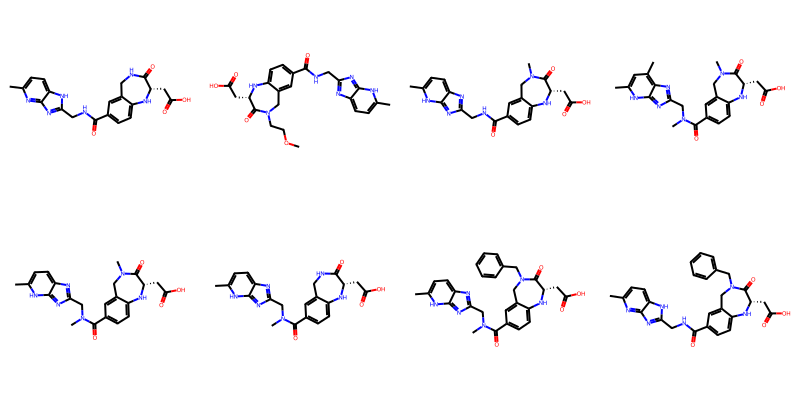

In [13]:
d = %sql postgresql://localhost/chembl_31 \
  select * from rdk.million_mols where m @> mol_to_xqmol(mol_from_ctab(:mb))\
            limit 10;
ms = [Chem.MolFromSmiles(y) for x,y in d]
Draw.MolsToGridImage(ms,molsPerRow=4)


# New Features


In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import rdkit
print(rdkit.__version__)

2023.09.1pre


## New supported file formats

### CDXML reading
(2022.09)

Developer: Brian Kelley

In [2]:
from rdkit import RDConfig
import os

fn = os.path.join(RDConfig.RDBaseDir,'Code','GraphMol','test_data','CDXML','beta-cypermethrin-or-abs.cdxml')
mols = Chem.MolsFromCDXMLFile(fn)
len(mols)


1

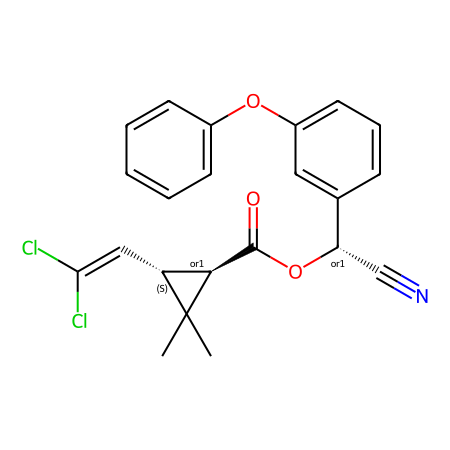

In [3]:
IPythonConsole.molSize = 450,450
IPythonConsole.drawOptions.addStereoAnnotation = True
mols[0]

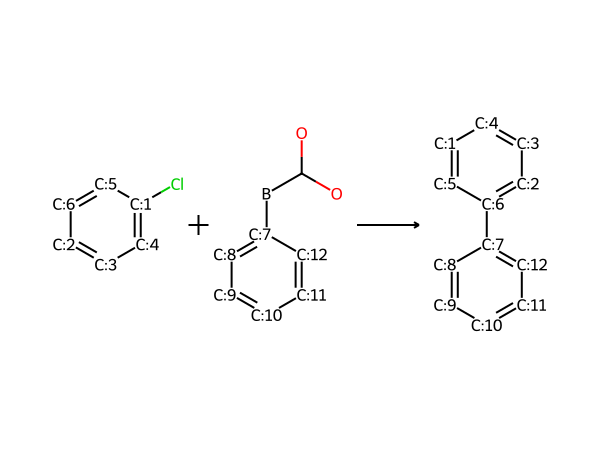

In [4]:
from rdkit.Chem import rdChemReactions
fn = os.path.join(RDConfig.RDBaseDir,'Code','GraphMol','test_data','CDXML','rxn2.cdxml')
rxn = rdChemReactions.ReactionsFromCDXMLFile(fn)[0]
rxn

### MRV reading and writing
(2023.09)

Developer: Tad Hurst

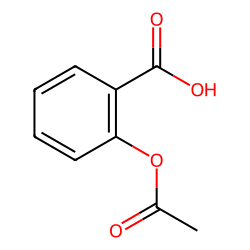

In [5]:
from rdkit import RDConfig
import os
IPythonConsole.molSize = 250,250

fn = os.path.join(RDConfig.RDBaseDir,'Code','GraphMol','MarvinParse','test_data','aspirin.mrv')
mol = Chem.MolFromMrvFile(fn)
mol


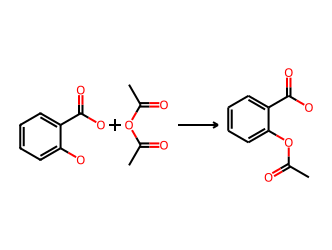

In [6]:
from rdkit.Chem import rdChemReactions
fn = os.path.join(RDConfig.RDBaseDir,'Code','GraphMol','MarvinParse','test_data','aspirineSynthesisWithAttributes.mrv')
rxn = rdChemReactions.ReactionFromMrvFile(fn)
rxn

We can write MRV as well:

In [7]:
mrv = Chem.MolToMrvBlock(mol,1,-1,1,1)
print(mrv[:1000])

<?xml version="1.0" encoding="windows-1252"?>
<cml xmlns="http://www.chemaxon.com" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.chemaxon.com http://www.chemaxon.com/marvin/schema/mrvSchema_20_20_0.xsd">
	<MDocument>
		<MChemicalStruct>
			<molecule molID="m1">
				<atomArray>
					<atom id="a1" elementType="C" x2="8.2077" y2="1.9251"/>
					<atom id="a2" elementType="C" x2="6.874" y2="1.1551"/>
					<atom id="a3" elementType="C" x2="6.874" y2="-0.3847"/>
					<atom id="a4" elementType="C" x2="8.2077" y2="-1.1545"/>
					<atom id="a5" elementType="C" x2="9.5415" y2="-0.3847"/>
					<atom id="a6" elementType="C" x2="9.5415" y2="1.1551"/>
					<atom id="a7" elementType="C" x2="10.8752" y2="1.9251"/>
					<atom id="a8" elementType="O" x2="10.8752" y2="3.4651"/>
					<atom id="a9" elementType="O" x2="12.2089" y2="1.1551"/>
					<atom id="a10" elementType="O" x2="10.8752" y2="-1.1549"/>
					<atom id="a11" elementType="C" x2="10.875" y2="-2.6949"/>
			

In [8]:
mrv = rdChemReactions.ReactionToMrvBlock(rxn,1)
print(mrv[:1000])

<?xml version="1.0" encoding="windows-1252"?>
<cml xmlns="http://www.chemaxon.com" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.chemaxon.com http://www.chemaxon.com/marvin/schema/mrvSchema_20_20_0.xsd">
	<MDocument>
		<MChemicalStruct>
			<reaction>
				<reactantList>
					<molecule molID="m1">
						<atomArray>
							<atom id="a1" elementType="C" x2="-10.8752" y2="1.4315"/>
							<atom id="a2" elementType="C" x2="-12.2089" y2="0.6615"/>
							<atom id="a3" elementType="C" x2="-12.2089" y2="-0.8783"/>
							<atom id="a4" elementType="C" x2="-10.8752" y2="-1.6483"/>
							<atom id="a5" elementType="C" x2="-9.5415" y2="-0.8783"/>
							<atom id="a6" elementType="C" x2="-9.5415" y2="0.6615"/>
							<atom id="a7" elementType="C" x2="-8.2077" y2="1.4315"/>
							<atom id="a8" elementType="O" x2="-8.2077" y2="2.9715"/>
							<atom id="a9" elementType="O" x2="-6.874" y2="0.6615"/>
							<atom id="a10" elementType="O" x2="-8.2077" y2="-1.6483"/

## Jupyter integration improvements

### Draw.MolsMatrixToGridImage
(2023.09)

Developer: Jeremy Monat

This new function allows molecules to be drawn in a grid with gaps.

In [9]:
with Chem.ForwardSDMolSupplier('./data/RGD_sets/data/jm6b00372.sdf') as suppl:
    mols = [x for x in suppl if x is not None]
len(mols)

78

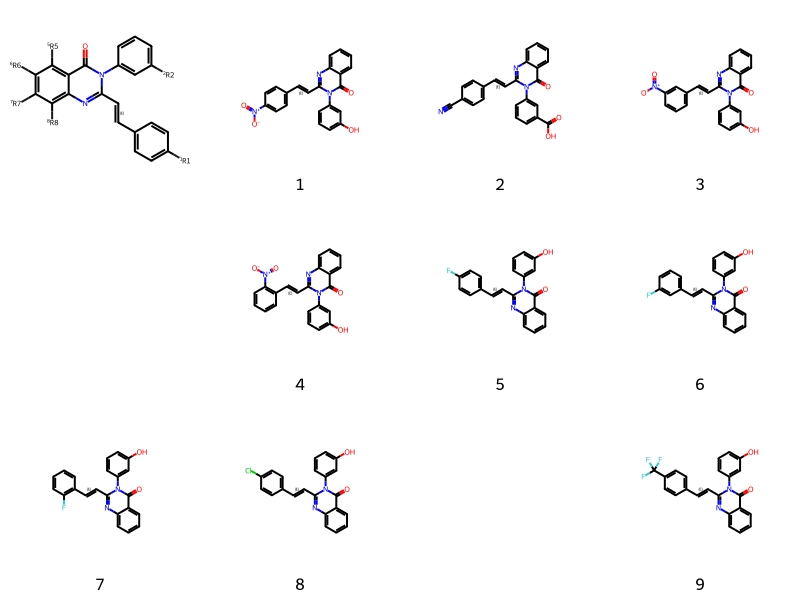

In [10]:
matrix = [[mols[0],mols[1],mols[2],mols[3]],
          [None,mols[4],mols[5],mols[6]],
          [mols[7],mols[8],None,mols[9]],
         ]
namesMatrix = []
for row in matrix:
    nrow = []
    for entry in row:
        if entry is None:
            nrow.append('')
        else:
            nrow.append(entry.GetProp('_Name'))
    namesMatrix.append(nrow)
Draw.MolsMatrixToGridImage(matrix,legendsMatrix=namesMatrix)


This works outside of the notebook as well.

## Interactive Renderer
(2022.03 and 2022.09 releases)

Developer: Paolo Tosco

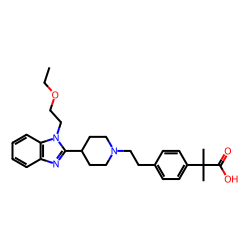

In [11]:
import requests
from io import BytesIO

bilastine_pubchem = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/CID/185460/record/SDF/?record_type=2d&response_type=save&response_basename=Structure2D_CID_185460'
response = requests.get(bilastine_pubchem, allow_redirects=True)
buf = BytesIO(response.content)
with Chem.ForwardSDMolSupplier(buf) as suppl:
    pcmol = next(suppl)

IPythonConsole.InteractiveRenderer.setEnabled()
pcmol

In [12]:
doravirine = Chem.MolFromSmiles('Cn1c(n[nH]c1=O)Cn2ccc(c(c2=O)Oc3cc(cc(c3)Cl)C#N)C(F)(F)F')
Draw.MolsToGridImage([pcmol,doravirine],subImgSize=(350,300))

"<div style=""width: 350px; height: 300px; margin: auto;"" class=""rdk-str-rnr-mol-container"" id=""rdk-str-rnr-mol-2599b776-56dd-11ee-a24f-3c219ccda716"" data-mol=""pkl_776t3gAAAAAPAAAAAAAAAAAAAAAdAAAAHwAAAIABBgBgAAAAAQMHQCgAAAADAwZAKAAAAAMEB0AoAAAAAwMHQDgAAAADAQMGQCgAAAADBAgAKAAAAAMCBgBgAAAAAgIHQCgAAAADAwZAaAAAAAMDAQZAaAAAAAMDAQZAKAAAAAMEBkAoAAAAAwQGQCgAAAADBAgAKAAAAAMCCAAoAAAAAwIGQCgAAAADBAZAaAAAAAMDAQZAKAAAAAMEBkBoAAAAAwMBBkAoAAAAAwQGQGgAAAADAwERACAAAAABBgAoAAAAAgQHACgAAAACAwYAIAAAAAQJACAAAAABCQAgAAAAAQkAIAAAAAELAAEAAQJoDAIDaAwDBGgMBAVoDAUGKAICBwAHCAAICWgMCQpoDAoLaAwLDGgMDA1oDA0OKAIMDyAPECAQEWgMERJoDBITaAwTFGgMFBVoDBQWABIXIBcYKAMLGQAZGgAZGwAZHAAFAWgMDQhoDBUQaAwUAwAAAAUBAgMEBQYJCgsMDQgGERITFBUQFwkAAAAAAAAAPwAAAAASAgAAAAAAExY="" data-content=""rdkit/molecule"" data-parent-node=""div[class*=jp-NotebookPanel-notebook]"" data-draw-opts=""{""addStereoAnnotation"":true}""/>"


The interactive renderer also works in data frames:

In [13]:
from rdkit.Chem import PandasTools
df = PandasTools.LoadSDF('./data/RGD_sets/data/jm6b00372.sdf')
df

scaffold  ID                                              ROMol  \
0         1      <rdkit.Chem.rdchem.Mol object at 0x000001B290B...   
1       NaN   1  <rdkit.Chem.rdchem.Mol object at 0x000001B290B...   
2       NaN   2  <rdkit.Chem.rdchem.Mol object at 0x000001B290B...   
3       NaN   3  <rdkit.Chem.rdchem.Mol object at 0x000001B290B...   
4       NaN   4  <rdkit.Chem.rdchem.Mol object at 0x000001B290B...   
..      ...  ..                                                ...   
73      NaN  73  <rdkit.Chem.rdchem.Mol object at 0x000001B2929...   
74      NaN  74  <rdkit.Chem.rdchem.Mol object at 0x000001B2929...   
75      NaN  75  <rdkit.Chem.rdchem.Mol object at 0x000001B2929...   
76      NaN  76  <rdkit.Chem.rdchem.Mol object at 0x000001B2929...   
77      NaN  77  <rdkit.Chem.rdchem.Mol object at 0x000001B2929...   

   S. aureus ATCC 29213 MIC (ug/mL)  
0                               NaN  
1                                 2  
2                                 2  
3                              >128  
4                               128  
..                              ...  
73                             >128  
74                               32  
75                               64  
76                              128  
77                               32  

[78 rows x 4 columns]

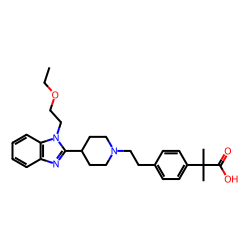

In [14]:
IPythonConsole.InteractiveRenderer.setEnabled(shouldEnable=False)
pcmol

## MolDraw2D improvements
(ongoing, this example shows features added for 2021.09, 2022.03, and 2022.09)

This is one area of the code which is being updated and tweaked in more or less every RDKit release.

Descriptions of most of the drawing options can be found here:
https://greglandrum.github.io/rdkit-blog/posts/2023-05-26-drawing-options-explained.html



In [19]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
IPythonConsole.molSize = 300,250

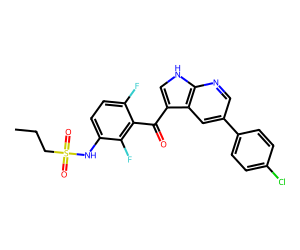

In [20]:
vemurafenib = Chem.MolFromSmiles('CCCS(=O)(=O)Nc1ccc(F)c(c1F)C(=O)c2c[nH]c3c2cc(cn3)c4ccc(Cl)cc4')
vemurafenib

### ACS1996 mode
(2022.09)

Developer: David Cosgrove, funded by Glysade

Along with a bunch of other small adjustments to get publication-ready output. 


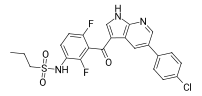

In [21]:
d2d = Draw.MolDraw2DSVG(-1,-1)
Draw.DrawMoleculeACS1996(d2d,vemurafenib)
d2d.FinishDrawing()
from IPython.display import SVG
SVG(d2d.GetDrawingText())

### Lasso highlighting
(2023.09)

Developer: David Cosgrove

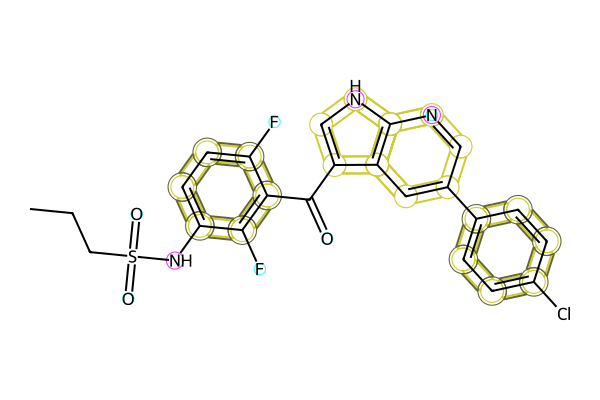

In [25]:
from rdkit import Chem
from rdkit.Chem import ChemicalFeatures
from rdkit import RDConfig
from collections import defaultdict
import os
fdefName = os.path.join(RDConfig.RDDataDir,'BaseFeatures.fdef')
factory = ChemicalFeatures.BuildFeatureFactory(fdefName)
feats = factory.GetFeaturesForMol(vemurafenib)

colors = {'Donor':(1.,.2,1),
         'Acceptor':(.2,1,1),
         'Aromatic':(.8,.8,.2),
         'LumpedHydrophobe':(.4,.4,.2)}
ats = defaultdict(list)
bonds = defaultdict(list)
arads = {}
lws = {}
for feat in feats:
    fam = feat.GetFamily()
    if fam not in colors:
        continue
    for aid in feat.GetAtomIds():
        ats[aid].append(colors[fam])
        arads[aid] = 0.2
        for aid2 in feat.GetAtomIds():
            if aid2>aid:
                bnd = vemurafenib.GetBondBetweenAtoms(aid,aid2)
                if bnd:
                    bonds[bnd.GetIdx()].append(colors[fam])
                
ats = dict(ats)
bonds = dict(bonds)
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
d2d = rdMolDraw2D.MolDraw2DSVG(600,400)
d2d.drawOptions().useBWAtomPalette()
d2d.drawOptions().fillHighlights = False
d2d.drawOptions().multiColourHighlightStyle = Draw.MultiColourHighlightStyle.Lasso
d2d.DrawMoleculeWithHighlights(vemurafenib, "", ats, bonds, arads, lws)
d2d.FinishDrawing()


SVG(d2d.GetDrawingText())


Note that the point here is to demonstrate the highlighting, not the quality of the feature assignments. These feature definitions really need to be improved (pull requests are, as always, welcome!).


### Drawing molecules in arbitrary positions on the canvas

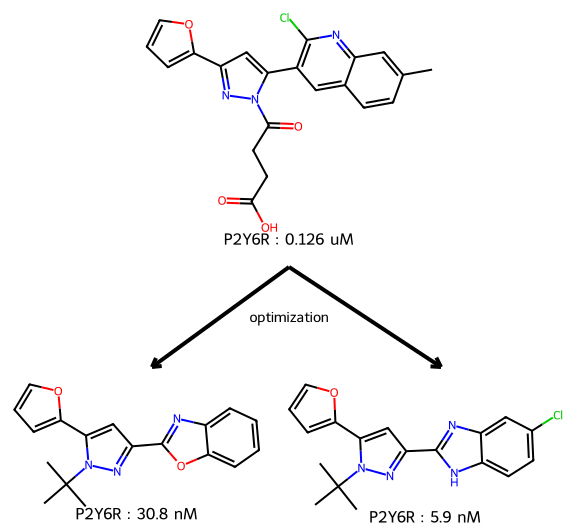

In [19]:
# structures from: https://pubs.acs.org/doi/10.1021/acs.jmedchem.3c00210
hit = Chem.MolFromSmiles('c1ccc(o1)-c1cc(n(n1)C(=O)CCC(=O)O)-c1c(Cl)nc2cc(C)ccc2c1')
lead = Chem.MolFromSmiles('c1ccc(o1)-c1cc(nn1C(C)(C)C)-c1[nH]c2ccc(Cl)cc2n1')
interm = Chem.MolFromSmiles('c1ccc(o1)-c1cc(nn1C(C)(C)C)-c1oc2ccccc2n1')
hitLabel = 'P2Y6R : 0.126 uM'
leadLabel = 'P2Y6R : 5.9 nM'
intermLabel = 'P2Y6R : 30.8 nM'


from IPython.display import SVG

from rdkit import Geometry
from rdkit.Chem.Draw import rdMolDraw2D

# start by figuring out how big the molecules are, including their legends
sizer = rdMolDraw2D.MolDraw2DSVG(-1,-1)
hit_sz = sizer.GetMolSize(hit,legend=hitLabel)
lead_sz = sizer.GetMolSize(lead,legend=leadLabel)
interm_sz = sizer.GetMolSize(interm,legend=intermLabel)

# define how long our arrows are and the amount of padding we want around them
arrowLength = 100
arrowPadding = 20

# figure out how big the final canvas will be:
width = max((lead_sz[0]+interm_sz[0]),hit_sz[0])
secondRowHeight = max(lead_sz[1],interm_sz[1])
height = secondRowHeight+hit_sz[1]+arrowLength + arrowPadding
d2d = rdMolDraw2D.MolDraw2DSVG(width,height)

# turn on flexi mode so that the molecules go where we tell them to go:
d2d.SetFlexiMode(True)
d2d.ClearDrawing()
d2d.drawOptions().clearBackground = False

# draw the first molecule at center top:
d2d.SetOffset(width//2 - hit_sz[0]//2,0)
d2d.DrawMolecule(hit,legend=hitLabel)

# Draw the next molecule at the left bottom
d2d.SetOffset(0,height-secondRowHeight)
d2d.DrawMolecule(interm,legend=intermLabel)

# Draw the next molecule at the right bottom
d2d.SetOffset(width - lead_sz[0],height-secondRowHeight)
d2d.DrawMolecule(lead,legend=leadLabel)


# draw the arrows:
arrowStart = Geometry.Point2D(width//2,hit_sz[1]+arrowPadding/2)
arrowEnd1 = arrowStart + Geometry.Point2D(0,arrowLength)
arrowEnd1.x -= interm_sz[0]/2
arrowEnd2 = arrowStart + Geometry.Point2D(0,arrowLength)
arrowEnd2.x += lead_sz[0]/2
d2d.SetOffset(0,0)
d2d.SetLineWidth(4)
d2d.DrawArrow(arrowStart,arrowEnd1,rawCoords=True)
d2d.DrawArrow(arrowStart,arrowEnd2,rawCoords=True)

# draw the label:
labelPos = arrowStart
labelPos.y += arrowLength/2
d2d.SetFontSize(d2d.FontSize()*1.2)
d2d.DrawString("optimization",labelPos,0,rawCoords=True)

d2d.FinishDrawing()

SVG(d2d.GetDrawingText())


### Improved drawing of special atoms

Developer: Paolo Tosco

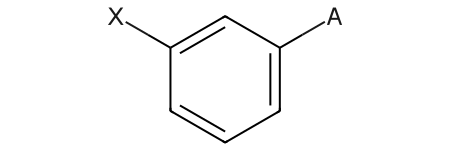

In [3]:
qmol = Chem.MolFromMolBlock('''
  Mrv2305 04202308462D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 8 8 0 0 0
M  V30 BEGIN ATOM
M  V30 1 C -2.6667 3.8734 0 0
M  V30 2 C -4.0003 3.1034 0 0
M  V30 3 C -4.0003 1.5633 0 0
M  V30 4 C -2.6667 0.7933 0 0
M  V30 5 C -1.333 1.5633 0 0
M  V30 6 C -1.333 3.1034 0 0
M  V30 7 A 0.0007 3.8733 0 0
M  V30 8 X -5.334 3.8733 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 2 2 3
M  V30 3 1 3 4
M  V30 4 2 4 5
M  V30 5 1 5 6
M  V30 6 2 1 6
M  V30 7 1 6 7
M  V30 8 1 2 8
M  V30 END BOND
M  V30 END CTAB
M  END
''')
qmol

This is what the code used to do:

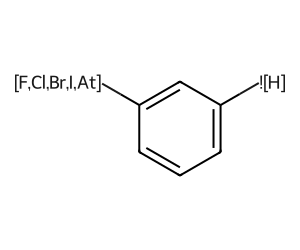

In [21]:
IPythonConsole.drawOptions.useComplexQueryAtomSymbols = False
qmol

As a reminder of what that used to look like:

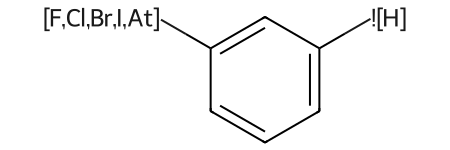

In [5]:
IPythonConsole.drawOptions.useComplexQueryAtomSymbols = False
qmol

In [6]:
IPythonConsole.drawOptions.useComplexQueryAtomSymbols = True

## MolStandardize improvements
(2023.09 release)

Many of the operations can now modify a molecule in place instead of making a copy.

Here's a silly example:

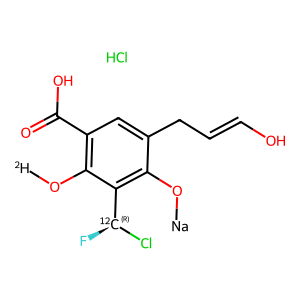

In [23]:
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit import RDLogger
# the standardization code is verbose... disable that
RDLogger.DisableLog('rdApp.info')
IPythonConsole.molSize = 300,300
msm1 = Chem.MolFromSmiles('[Na]Oc1c([12C@H](F)Cl)c(O[2H])c(C(=O)O)cc1CC=CO.Cl')
msm1

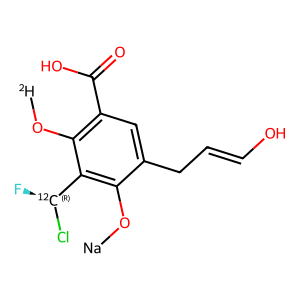

In [24]:
stripped = rdMolStandardize.RemoveFragments(msm1)
stripped

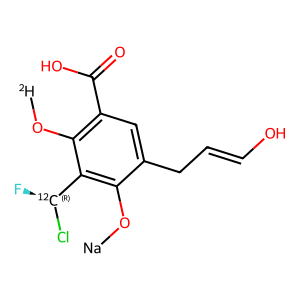

In [25]:
cp = Chem.Mol(msm1)
rdMolStandardize.RemoveFragmentsInPlace(cp)
cp


This can have a significant performance impact:

In [26]:
%timeit cp = Chem.Mol(msm1);rdMolStandardize.Normalize(cp)

892 µs ± 8.05 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [27]:
%timeit cp = Chem.Mol(msm1);rdMolStandardize.NormalizeInPlace(cp)

731 µs ± 8.78 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [28]:
RDLogger.EnableLog('rdApp.info')


### Aside: running reactions "in place"

This is functionality added a few years ago (v2021.09), but it's worth bringing up again.

Reactions with a product which do not add atoms to the product can tbe run "in place" : modifying the molecule passed in instead of creating a new molecule.

This can have a significant performance impact.

In [25]:
from rdkit.Chem import rdChemReactions
rxn = rdChemReactions.ReactionFromSmarts('[C,S&!$([S+]-[O-]);X3+1:1]([NX3:2])[NX3!H0:3]>>[*+0:1]([N:2])=[N+:3]')

Here's a simple reaction from the standardization code:

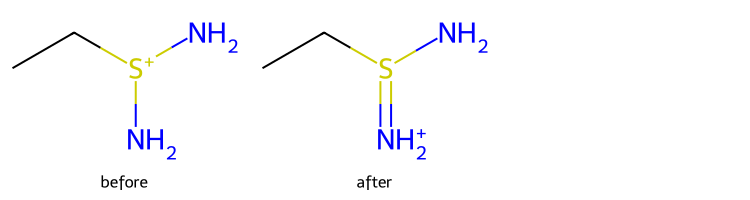

In [26]:
m = Chem.MolFromSmiles('CC[S+](N)N')
ps = rxn.RunReactants((m,))
Chem.SanitizeMol(ps[0][0])
Draw.MolsToGridImage([m,ps[0][0]],legends=['before','after'],subImgSize=(250,200))

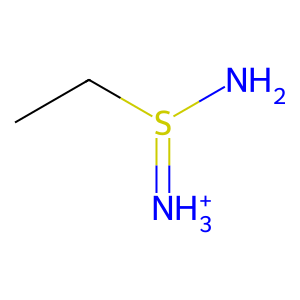

In [27]:
cp = Chem.Mol(m)
rxn.RunReactantInPlace(cp)
cp

In [28]:
%timeit cp = Chem.Mol(m);rxn.RunReactants((cp,))

20.3 µs ± 343 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [29]:
%timeit cp = Chem.Mol(m);rxn.RunReactantInPlace(cp)

6.93 µs ± 32.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


## Canonicalization of stereo groups
(2023.03)

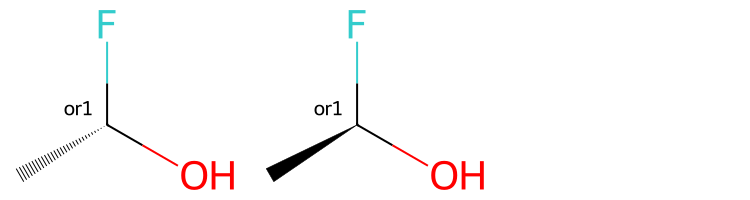

In [44]:
m1 = Chem.MolFromSmiles('C[C@H](F)O |o1:1|')
m2 = Chem.MolFromSmiles('C[C@@H](F)O |o1:1|')
dos = Draw.MolDrawOptions()
dos.addStereoAnnotation = True
Draw.MolsToGridImage((m1,m2),subImgSize=(250,200),drawOptions=dos)

In [45]:
print(Chem.MolToCXSmiles(m1))
print(Chem.MolToCXSmiles(m2))

C[C@H](O)F |o1:1|
C[C@H](O)F |o1:1|


## ChEMBL filter sets now available in the FilterCatalog
(2023.03)

Based on Pat Walters' [version of the ChEMBL filters](https://github.com/PatWalters/rd_filters)

In [46]:
from rdkit.Chem import rdfiltercatalog

fcp = rdfiltercatalog.FilterCatalogParams()
fcp.AddCatalog(rdfiltercatalog.FilterCatalogParams.FilterCatalogs.CHEMBL)
fc = rdfiltercatalog.FilterCatalog(fcp)
fc.GetNumEntries()

770

In [47]:
m = Chem.MolFromSmiles('c1ccccc1CCl')
l = fc.GetMatches(m)
for i,entry in enumerate(l):
    print(i,entry.GetDescription())

0 R1 Reactive alkyl halides
1 alkyl halide
2 primary_halide_sulfate
3 alkyl_halides
4 alkyl halide
5 Filter6_benzyl_halide
6 alkyl halide


## Allow easy access to matched experimental torsions for ETKDG
(2023.03)

In [48]:
from rdkit.Chem import rdDistGeom
doravirine = Chem.MolFromSmiles('Cn1c(n[nH]c1=O)Cn2ccc(c(c2=O)Oc3cc(cc(c3)Cl)C#N)C(F)(F)F')
m = Chem.AddHs(doravirine)
torsions = rdDistGeom.GetExperimentalTorsions(m)

torsions

({'bondIndex': 15,
  'torsionIndex': 16,
  'smarts': '[cH1:1][c:2]([cH1])!@;-[O:3][c:4]',
  'V': <rdkit.rdBase._vectdouble at 0x1b292b19340>,
  'signs': <rdkit.rdBase._vectint at 0x1b292b193c0>,
  'atomIndices': <rdkit.rdBase._vectunsigned int at 0x1b292b19440>},
 {'bondIndex': 14,
  'torsionIndex': 18,
  'smarts': '[cH0:1][c:2]([cH0])!@;-[O:3][c:4]',
  'V': <rdkit.rdBase._vectdouble at 0x1b292b194c0>,
  'signs': <rdkit.rdBase._vectint at 0x1b292b19540>,
  'atomIndices': <rdkit.rdBase._vectunsigned int at 0x1b292b195c0>},
 {'bondIndex': 7,
  'torsionIndex': 157,
  'smarts': '[!#1:1][CH2:2]!@;-[n:3][cH0:4]',
  'V': <rdkit.rdBase._vectdouble at 0x1b292b19640>,
  'signs': <rdkit.rdBase._vectint at 0x1b292b196c0>,
  'atomIndices': <rdkit.rdBase._vectunsigned int at 0x1b292b19740>},
 {'bondIndex': 24,
  'torsionIndex': 280,
  'smarts': '[cH0:1][c:2]!@;-[CX4H0:3][*:4]',
  'V': <rdkit.rdBase._vectdouble at 0x1b292b197c0>,
  'signs': <rdkit.rdBase._vectint at 0x1b292b19840>,
  'atomIndices': <

## Allow access to failure causes when doing conformer generation
(2023.03)

There's a blog post about this one: https://greglandrum.github.io/rdkit-blog/posts/2023-05-17-understanding-confgen-errors.html

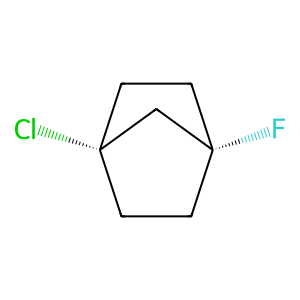

In [49]:
m = Chem.MolFromSmiles('C1C[C@]2(F)CC[C@@]1(Cl)C2')
m

In [50]:
mh = Chem.AddHs(m)
ps = rdDistGeom.ETKDGv3()
ps.randomSeed = 0xf00d
ps.trackFailures = True
print(rdDistGeom.EmbedMolecule(mh,ps))
counts = ps.GetFailureCounts()
counts

0


(0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

Now create a structure which cannot realistically exist:

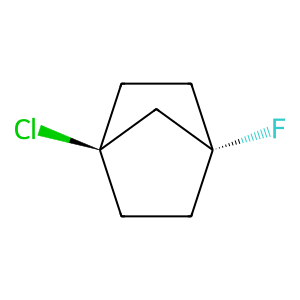

In [51]:
m = Chem.MolFromSmiles('C1C[C@]2(F)CC[C@]1(Cl)C2')
m

In [52]:
mh = Chem.AddHs(m)
print(rdDistGeom.EmbedMolecule(mh,ps))
counts = ps.GetFailureCounts()
counts

-1


(7, 11, 30, 0, 0, 0, 142, 0, 0, 0)

In [53]:
def print_failure_causes(counts):
    for i,k in enumerate(rdDistGeom.EmbedFailureCauses.names):
        print(k,counts[i])
print_failure_causes(counts)

INITIAL_COORDS 7
FIRST_MINIMIZATION 11
CHECK_TETRAHEDRAL_CENTERS 30
CHECK_CHIRAL_CENTERS 0
MINIMIZE_FOURTH_DIMENSION 0
ETK_MINIMIZATION 0
FINAL_CHIRAL_BOUNDS 142
FINAL_CENTER_IN_VOLUME 0
LINEAR_DOUBLE_BOND 0
BAD_DOUBLE_BOND_STEREO 0


There's more detail about what each of these mean in the [blog post](https://greglandrum.github.io/rdkit-blog/posts/2023-05-17-understanding-confgen-errors.html)

## Optional sequential random-number seeds in conformer generator
(2023.09)

This lets you generate sets of conformers for a molecule using multiple processes in an easily reproducible manner.

In [140]:
from rdkit.Chem import rdDistGeom
ps = rdDistGeom.ETKDGv3()
ps.enableSequentialRandomSeeds = True
ps.randomSeed = 0xf00d

mol = Chem.AddHs(vemurafenib)

mcp1 = Chem.Mol(mol)
rdDistGeom.EmbedMultipleConfs(mcp1,100,ps)

mcp2 = Chem.Mol(mol)
rdDistGeom.EmbedMultipleConfs(mcp2,50,ps)

ps.randomSeed += 50
mcp3 = Chem.Mol(mol)
rdDistGeom.EmbedMultipleConfs(mcp3,50,ps)

ps1 = mcp1.GetConformer(0).GetPositions()
ps2 = mcp2.GetConformer(0).GetPositions()
print(ps1[:3])
print(ps2[:3])

print('-------------')
ps1 = mcp1.GetConformer(50).GetPositions()
ps2 = mcp3.GetConformer(0).GetPositions()
print(ps1[:3])
print(ps2[:3])



[[-7.79750204e+00 -1.67505026e+00 -2.20603354e-01]
 [-7.44036047e+00 -2.35460233e-01  6.56942304e-03]
 [-6.11797636e+00  1.35438114e-01 -6.74025521e-01]]
[[-7.79750204e+00 -1.67505026e+00 -2.20603354e-01]
 [-7.44036047e+00 -2.35460233e-01  6.56942304e-03]
 [-6.11797636e+00  1.35438114e-01 -6.74025521e-01]]
-------------
[[ 7.57226858 -1.64141182 -0.3427249 ]
 [ 6.50359551 -0.5965702  -0.60788682]
 [ 6.35229236  0.29241483  0.61829674]]
[[ 7.57226858 -1.64141182 -0.3427249 ]
 [ 6.50359551 -0.5965702  -0.60788682]
 [ 6.35229236  0.29241483  0.61829674]]


## Expansion of the fingerprint generator functionality
(2022.09)

There's a blog post with more detail about this as well as a tutorial:
https://greglandrum.github.io/rdkit-blog/posts/2023-01-18-fingerprint-generator-tutorial.html

In [54]:
from rdkit.Chem import rdFingerprintGenerator
mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=2048)
fmfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=2048,
                                                    atomInvariantsGenerator=rdFingerprintGenerator.GetMorganFeatureAtomInvGen())
apfpgen = rdFingerprintGenerator.GetAtomPairGenerator(fpSize=2048)
ttfpgen = rdFingerprintGenerator.GetTopologicalTorsionGenerator(fpSize=2048)
rdkfpgen = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=5,fpSize=2048)


These all use the same API for generating fingerprints

In [55]:
bitVector = mfpgen.GetFingerprint(vemurafenib)
countVector = mfpgen.GetCountFingerprint(vemurafenib)
sparseBitVector = mfpgen.GetSparseFingerprint(vemurafenib)
sparseCountVector = mfpgen.GetSparseCountFingerprint(vemurafenib)

There's also a consistent API for getting information about fingerprint bits; see the blog post.

## rdkitjson format
(2023.03, 2023.09)

Extends the commonchem format to provide more complete text-based serialization of RDKit molecule objects.

In [129]:
import json
m = Chem.MolFromSmiles('Cc1ccccc1')
print(Chem.MolToJSON(m))

{"rdkitjson":{"version":11},"defaults":{"atom":{"z":6,"impHs":0,"chg":0,"nRad":0,"isotope":0,"stereo":"unspecified"},"bond":{"bo":1,"stereo":"unspecified"}},"molecules":[{"atoms":[{"impHs":3},{},{"impHs":1},{"impHs":1},{"impHs":1},{"impHs":1},{"impHs":1}],"bonds":[{"atoms":[0,1]},{"bo":2,"atoms":[1,2]},{"atoms":[2,3]},{"bo":2,"atoms":[3,4]},{"atoms":[4,5]},{"bo":2,"atoms":[5,6]},{"atoms":[6,1]}],"extensions":[{"name":"rdkitRepresentation","formatVersion":2,"toolkitVersion":"2023.09.1pre","aromaticAtoms":[1,2,3,4,5,6],"aromaticBonds":[1,2,3,4,5,6],"cipRanks":[0,4,3,2,1,2,3],"atomRings":[[1,6,5,4,3,2]]}]}]}


In [130]:
q = Chem.MolFromSmarts('[#6][C,N]')
print(Chem.MolToJSON(q))

{"rdkitjson":{"version":11},"defaults":{"atom":{"z":6,"impHs":0,"chg":0,"nRad":0,"isotope":0,"stereo":"unspecified"},"bond":{"bo":1,"stereo":"unspecified"}},"molecules":[{"atoms":[{},{"z":0}],"bonds":[{"atoms":[0,1]}],"extensions":[{"name":"rdkitRepresentation","formatVersion":2,"toolkitVersion":"2023.09.1pre"},{"name":"rdkitQueries","formatVersion":10,"toolkitVersion":"2023.09.1pre","atomQueries":[{"descr":"AtomAtomicNum","tag":33,"val":6},{"descr":"AtomOr","tag":31,"children":[{"descr":"AtomType","tag":33,"val":6},{"descr":"AtomType","tag":33,"val":7}]}],"bondQueries":[{"descr":"SingleOrAromaticBond","type":"BondOrder","tag":33,"val":1}]}]}]}


In [132]:
from rdkit.Chem import rdGeneralizedSubstruct
qry = Chem.MolFromSmiles('COCc1n[nH]c(F)c1 |LN:2:1.3|')
xqm = rdGeneralizedSubstruct.CreateExtendedQueryMol(qry)
print(xqm.ToJSON())

{
    "xqm_type": "4",
    "num_entries": "3",
    "tautomerQueries": [
        {
            "tautomers": [
                {
                    "pkl": "776t3gAAAAAPAAAAAAAAAAAAAAAJAAAACQAAAIABCAAoAAAAAAIGAGgAAAAAAgIGQCgAAAAABAYAYAAAAAEDB0AoAAAAAwMGQGgAAAADAwEHQDgAAAADAQMGQCgAAAADBAkAIAAAAAELAAEAAQIAAwAAAgRIDAUCSAwEBkgMBwVIDAYHSAwHCAAUAQAAAAUCBAYHBRcEAAAAAAAAABY=",
                    "smiles": "COCc1cc(F)[nH]n1"
                },
                {
                    "pkl": "776t3gAAAAAPAAAAAAAAAAAAAAAJAAAACQAAAIABCAAgAAAAAgYAYAAAAAICBkAoAAAAAwQGAGAAAAABAwdAOAAAAAMBAwZAaAAAAAMDAQdgKAAAAAMDBkAoAAAAAwQJACAAAAABCwABAAECAAMAAAIEaAwFAmgMBAZoDAcFaAwGB2gMBwgAFAEAAAAFAgQGBwUXBAAAAAAAAAAW",
                    "smiles": "COCc1cc(F)n[nH]1"
                }
            ],
            "template": {
                "pkl": "776t3gAAAAAPAAAAAAAAAAAAAAAJAAAACQAAAIABCAAoAAAAAAIGAGgAAAAAAgIGQCgAAAAABAYAYAAAAAEDBxAIAAAAABkNAAAAQXRvbUF0b21pY051bSEaBwAAAAAAAAAcACsGQGgAAAADAwEHEAgAAAAAGQ0AAABBdG9tQXRvb

## Optional wedging of two bonds on chiral centers
(2023.03)

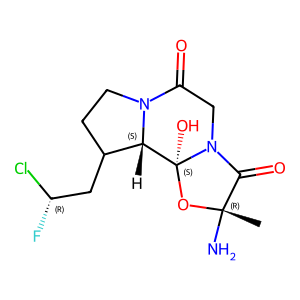

In [56]:
from rdkit.Chem import Draw
m = Chem.MolFromSmiles('[H][C@@]12C(C[C@H](F)Cl)CCN1C(=O)CN1C(=O)[C@](C)(N)O[C@]12O')
mh = Draw.PrepareMolForDrawing(m, wedgeBonds=False)

# default behavior:
Chem.WedgeMolBonds(mh,mh.GetConformer())
mh

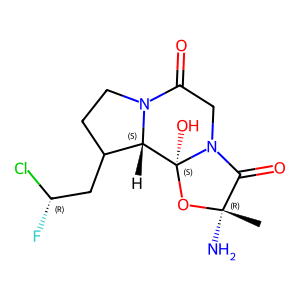

In [57]:
mh = Draw.PrepareMolForDrawing(m, wedgeBonds=False)

# Wedging two bonds:
ps = Chem.BondWedgingParameters()
ps.wedgeTwoBondsIfPossible = True
Chem.WedgeMolBonds(mh,mh.GetConformer(),ps)
mh

## Making it easy to calculate all 2D descriptors
(2023.03)

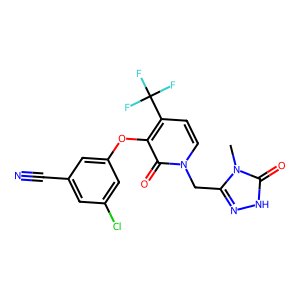

In [58]:
doravirine = Chem.MolFromSmiles('Cn1c(n[nH]c1=O)Cn2ccc(c(c2=O)Oc3cc(cc(c3)Cl)C#N)C(F)(F)F')
doravirine

In [59]:
from rdkit.Chem import Descriptors
descrs = Descriptors.CalcMolDescriptors(doravirine)
descrs

{'MaxAbsEStateIndex': 13.412553309006833,
 'MaxEStateIndex': 13.412553309006833,
 'MinAbsEStateIndex': 0.045220418860841605,
 'MinEStateIndex': -4.871620672188628,
 'qed': 0.6914051268589833,
 'MolWt': 425.754,
 'HeavyAtomMolWt': 414.66600000000005,
 'ExactMolWt': 425.050251552,
 'NumValenceElectrons': 150,
 'NumRadicalElectrons': 0,
 'MaxPartialCharge': 0.4197525104273902,
 'MinPartialCharge': -0.45079941098947357,
 'MaxAbsPartialCharge': 0.45079941098947357,
 'MinAbsPartialCharge': 0.4197525104273902,
 'FpDensityMorgan1': 1.3103448275862069,
 'FpDensityMorgan2': 2.0344827586206895,
 'FpDensityMorgan3': 2.6206896551724137,
 'BCUT2D_MWHI': 35.495691906445956,
 'BCUT2D_MWLOW': 10.182401353178228,
 'BCUT2D_CHGHI': 2.363442602497932,
 'BCUT2D_CHGLO': -2.1532454345808123,
 'BCUT2D_LOGPHI': 2.362094239067197,
 'BCUT2D_LOGPLOW': -2.2620565247489415,
 'BCUT2D_MRHI': 6.30376236817795,
 'BCUT2D_MRLOW': -0.13831572005086737,
 'AvgIpc': 2.951845570725043,
 'BalabanJ': 2.1143058157682066,
 'BertzC

## Logging using the python logger
(2022.03)

Developers: Kevin Burk, Brian Kelley

This one is a bit older, but I suspect most people don't know about it

In [142]:
Chem.MolFromSmiles('CO(C)C')

[09:29:57] Explicit valence for atom # 1 O, 3, is greater than permitted


In [144]:
from rdkit import rdBase

import logging
pylog = logging.getLogger("rdkit")
pylog.setLevel(logging.CRITICAL)

rdBase.LogToPythonLogger()
Chem.MolFromSmiles('CO(C)C')

In [146]:
pylog.setLevel(logging.WARN)
Chem.MolFromSmiles('CO(C)C')

[09:33:23] Explicit valence for atom # 1 O, 3, is greater than permitted


In [148]:
# this is the default behavior in the notebook
rdBase.LogToPythonStderr()


## Registration Hash
(2022.09, 2023.03)


### Tautomers

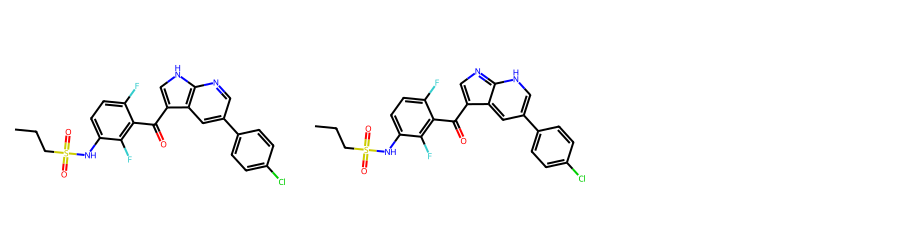

In [44]:
vemurafenib = Chem.MolFromSmiles('CCCS(=O)(=O)Nc1ccc(F)c(c1F)C(=O)c2c[nH]c3c2cc(cn3)c4ccc(Cl)cc4')
vemurafenib_taut = Chem.MolFromSmiles('CCCS(=O)(=O)Nc1ccc(F)c(c1F)C(=O)c2cnc3c2cc(c[nH]3)c4ccc(Cl)cc4')
Draw.MolsToGridImage([vemurafenib,vemurafenib_taut],subImgSize=(300,250))

In [45]:
from rdkit.Chem import RegistrationHash
def compare_layers(mol1,mol2):
    h1 = RegistrationHash.GetMolLayers(mol1)
    h2 = RegistrationHash.GetMolLayers(mol2)
    for k in h1:
        if h1[k] and h1[k] != '[]' and h1[k] == h2[k]:
            print(f'{k}:\n {h1[k]}\n {h2[k]}')
def show_differing_layers(mol1,mol2):
    h1 = RegistrationHash.GetMolLayers(mol1)
    h2 = RegistrationHash.GetMolLayers(mol2)
    for k in h1:
        if h1[k] != h2[k]:
            print(f'{k}:\n {h1[k]}\n {h2[k]}')


In [46]:
RegistrationHash.GetMolLayers(vemurafenib)

{<HashLayer.CANONICAL_SMILES: 1>: 'CCCS(=O)(=O)Nc1ccc(F)c(C(=O)c2c[nH]c3ncc(-c4ccc(Cl)cc4)cc23)c1F',
 <HashLayer.ESCAPE: 2>: '',
 <HashLayer.FORMULA: 3>: 'C23H18ClF2N3O3S',
 <HashLayer.NO_STEREO_SMILES: 4>: 'CCCS(=O)(=O)Nc1ccc(F)c(C(=O)c2c[nH]c3ncc(-c4ccc(Cl)cc4)cc23)c1F',
 <HashLayer.NO_STEREO_TAUTOMER_HASH: 5>: 'CCCS([O])([O])[N][C]1[CH][CH][C](F)[C]([C]([O])[C]2[CH][N][C]3[N][CH][C]([C]4[CH][CH][C](Cl)[CH][CH]4)[CH][C]32)[C]1F_2_0',
 <HashLayer.SGROUP_DATA: 6>: '[]',
 <HashLayer.TAUTOMER_HASH: 7>: 'CCCS([O])([O])[N][C]1[CH][CH][C](F)[C]([C]([O])[C]2[CH][N][C]3[N][CH][C]([C]4[CH][CH][C](Cl)[CH][CH]4)[CH][C]32)[C]1F_2_0'}

In [47]:
compare_layers(vemurafenib,vemurafenib_taut)

HashLayer.FORMULA:
 C23H18ClF2N3O3S
 C23H18ClF2N3O3S
HashLayer.NO_STEREO_TAUTOMER_HASH:
 CCCS([O])([O])[N][C]1[CH][CH][C](F)[C]([C]([O])[C]2[CH][N][C]3[N][CH][C]([C]4[CH][CH][C](Cl)[CH][CH]4)[CH][C]32)[C]1F_2_0
 CCCS([O])([O])[N][C]1[CH][CH][C](F)[C]([C]([O])[C]2[CH][N][C]3[N][CH][C]([C]4[CH][CH][C](Cl)[CH][CH]4)[CH][C]32)[C]1F_2_0
HashLayer.TAUTOMER_HASH:
 CCCS([O])([O])[N][C]1[CH][CH][C](F)[C]([C]([O])[C]2[CH][N][C]3[N][CH][C]([C]4[CH][CH][C](Cl)[CH][CH]4)[CH][C]32)[C]1F_2_0
 CCCS([O])([O])[N][C]1[CH][CH][C](F)[C]([C]([O])[C]2[CH][N][C]3[N][CH][C]([C]4[CH][CH][C](Cl)[CH][CH]4)[CH][C]32)[C]1F_2_0


### Tautomers v2

Differences between the hashes:

#### v1:
- sum up all formal charges and set them to zero
- count and remove implicit Hs from heteroatoms
- set all conjugated bonds to single
- remove stereo from affected bonds


#### v2:
- only consider conjugated regions with a heteroatom
- removes all implicit Hs in conjugated regions
- sets bond type in conjugated regions to "aromatic"
- handles keto-enol tautomerism
- all Hs are explicit in output




V1 hash: [O][CH][CH][C]([O])[O]_2_0
V2 hash: [O]:[C]:[C]:[C](:[O]):[O]_4_0



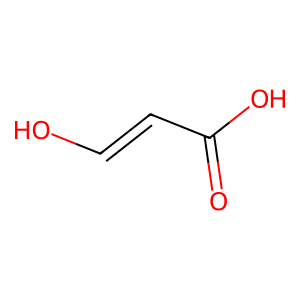

In [48]:
from rdkit.Chem import rdMolHash
mol = Chem.MolFromSmiles('OC(=O)C=CO')
taut_v1 = rdMolHash.MolHash(mol,rdMolHash.HashFunction.HetAtomTautomer)
taut_v2 = rdMolHash.MolHash(mol,rdMolHash.HashFunction.HetAtomTautomerv2)
print(f'''
V1 hash: {taut_v1}
V2 hash: {taut_v2}
''')
mol


V1 hash: [O][C]1[CH][C](CCC[C]2[CH][CH][CH][CH][CH]2)[N][N]1_2_0
V2 hash: [O]:[C]1:[C]:[C](:[C]-[CH2]-[CH2]-[c]2:[cH]:[cH]:[cH]:[cH]:[cH]:2):[N]:[N]:1_5_0



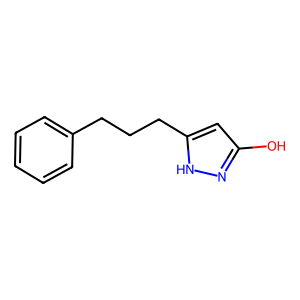

In [49]:
from rdkit.Chem import rdMolHash
mol = Chem.MolFromSmiles('c1ccccc1CCCc1cc(O)n[nH]1')
taut_v1 = rdMolHash.MolHash(mol,rdMolHash.HashFunction.HetAtomTautomer)
taut_v2 = rdMolHash.MolHash(mol,rdMolHash.HashFunction.HetAtomTautomerv2)
print(f'''
V1 hash: {taut_v1}
V2 hash: {taut_v2}
''')
mol


V1 hash: CCCCCCC[CH][CH][O]_1_0
V2 hash: [CH3]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[C]:[C]:[O]_3_0



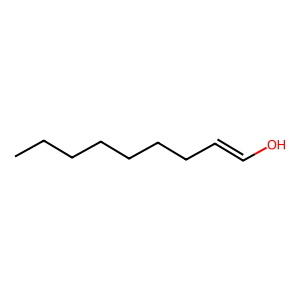

In [50]:
from rdkit.Chem import rdMolHash
mol = Chem.MolFromSmiles('OC=CCCCCCCC')
taut_v1 = rdMolHash.MolHash(mol,rdMolHash.HashFunction.HetAtomTautomer)
taut_v2 = rdMolHash.MolHash(mol,rdMolHash.HashFunction.HetAtomTautomerv2)
print(f'''
V1 hash: {taut_v1}
V2 hash: {taut_v2}
''')
mol

This works with the registration hash too:

In [51]:
RegistrationHash.GetMolLayers(vemurafenib,enable_tautomer_hash_v2=True)

{<HashLayer.CANONICAL_SMILES: 1>: 'CCCS(=O)(=O)Nc1ccc(F)c(C(=O)c2c[nH]c3ncc(-c4ccc(Cl)cc4)cc23)c1F',
 <HashLayer.ESCAPE: 2>: '',
 <HashLayer.FORMULA: 3>: 'C23H18ClF2N3O3S',
 <HashLayer.NO_STEREO_SMILES: 4>: 'CCCS(=O)(=O)Nc1ccc(F)c(C(=O)c2c[nH]c3ncc(-c4ccc(Cl)cc4)cc23)c1F',
 <HashLayer.NO_STEREO_TAUTOMER_HASH: 5>: '[CH3]-[C]:[C]:[S](:[O])(:[O]):[N]:[C]1:[C]:[C]:[C](-[F]):[C](:[C](:[O]):[C]2:[C]:[N]:[C]3:[N]:[C]:[C](:[C]4:[C]:[C]:[C](-[Cl]):[C]:[C]:4):[C]:[C]:3:2):[C]:1-[F]_15_0',
 <HashLayer.SGROUP_DATA: 6>: '[]',
 <HashLayer.TAUTOMER_HASH: 7>: '[CH3]-[C]:[C]:[S](:[O])(:[O]):[N]:[C]1:[C]:[C]:[C](-[F]):[C](:[C](:[O]):[C]2:[C]:[N]:[C]3:[N]:[C]:[C](:[C]4:[C]:[C]:[C](-[Cl]):[C]:[C]:4):[C]:[C]:3:2):[C]:1-[F]_15_0'}

### Polymers

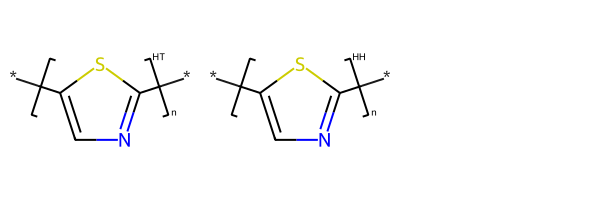

In [52]:
ht_polymer = Chem.MolFromMolBlock('''
  Mrv2102 10112211072D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 7 7 1 0 0
M  V30 BEGIN ATOM
M  V30 1 S -2.875 -1.1483 0 0
M  V30 2 C -4.1209 -2.0536 0 0
M  V30 3 C -3.645 -3.5181 0 0
M  V30 4 N -2.105 -3.5181 0 0
M  V30 5 C -1.6291 -2.0536 0 0
M  V30 6 * -5.5855 -1.5777 0 0
M  V30 7 * -0.1645 -1.5777 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 1 3 4
M  V30 3 1 1 5
M  V30 4 2 2 3
M  V30 5 2 4 5
M  V30 6 1 2 6
M  V30 7 1 5 7
M  V30 END BOND
M  V30 BEGIN SGROUP
M  V30 1 SRU 0 ATOMS=(5 2 3 4 1 5) XBONDS=(2 6 7) BRKXYZ=(9 -1.3116 -0.9788 0 -
M  V30 -0.7405 -2.7364 0 0 0 0) BRKXYZ=(9 -5.0095 -2.7364 0 -4.4384 -0.9788 0 -
M  V30 0 0 0) CONNECT=HT LABEL=n
M  V30 END SGROUP
M  V30 END CTAB
M  END
''')
hh_polymer = Chem.MolFromMolBlock('''
  Mrv2102 10112211072D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 7 7 1 0 0
M  V30 BEGIN ATOM
M  V30 1 S -2.875 -1.1483 0 0
M  V30 2 C -4.1209 -2.0536 0 0
M  V30 3 C -3.645 -3.5181 0 0
M  V30 4 N -2.105 -3.5181 0 0
M  V30 5 C -1.6291 -2.0536 0 0
M  V30 6 * -5.5855 -1.5777 0 0
M  V30 7 * -0.1645 -1.5777 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 1 3 4
M  V30 3 1 1 5
M  V30 4 2 2 3
M  V30 5 2 4 5
M  V30 6 1 2 6
M  V30 7 1 5 7
M  V30 END BOND
M  V30 BEGIN SGROUP
M  V30 1 SRU 0 ATOMS=(5 2 3 4 1 5) XBONDS=(2 6 7) BRKXYZ=(9 -1.3116 -0.9788 0 -
M  V30 -0.7405 -2.7364 0 0 0 0) BRKXYZ=(9 -5.0095 -2.7364 0 -4.4384 -0.9788 0 -
M  V30 0 0 0) CONNECT=HH LABEL=n
M  V30 END SGROUP
M  V30 END CTAB
M  END
''')
Draw.MolsToGridImage([ht_polymer,hh_polymer])

In [53]:
show_differing_layers(ht_polymer,hh_polymer)

HashLayer.SGROUP_DATA:
 [{"type": "SRU", "atoms": [1, 2, 3, 4, 6], "bonds": [[0, 1], [4, 5]], "index": 1, "connect": "HT", "label": "n"}]
 [{"type": "SRU", "atoms": [1, 2, 3, 4, 6], "bonds": [[0, 1], [4, 5]], "index": 1, "connect": "HH", "label": "n"}]


### Stereochemistry

In [54]:
ss_ethambutol = Chem.MolFromSmiles('CC[C@@H](CO)NCCN[C@@H](CC)CO')
rr_ethambutol = Chem.MolFromSmiles('CC[C@H](CO)NCCN[C@H](CC)CO')
and_ethambutol = Chem.MolFromSmiles('CC[C@@H](CO)NCCN[C@@H](CC)CO |&1:2,9|')
or_ethambutol = Chem.MolFromSmiles('CC[C@@H](CO)NCCN[C@@H](CC)CO |o1:2,9|')
and_ethambutol2 = Chem.MolFromSmiles('CC[C@H](CO)NCCN[C@H](CC)CO |&1:2,9|')


In [55]:
compare_layers(ss_ethambutol,rr_ethambutol)

HashLayer.FORMULA:
 C10H24N2O2
 C10H24N2O2
HashLayer.NO_STEREO_SMILES:
 CCC(CO)NCCNC(CC)CO
 CCC(CO)NCCNC(CC)CO
HashLayer.NO_STEREO_TAUTOMER_HASH:
 CCC(C[O])[N]CC[N]C(CC)C[O]_4_0
 CCC(C[O])[N]CC[N]C(CC)C[O]_4_0


In [56]:
show_differing_layers(ss_ethambutol,rr_ethambutol)

HashLayer.CANONICAL_SMILES:
 CC[C@@H](CO)NCCN[C@@H](CC)CO
 CC[C@H](CO)NCCN[C@H](CC)CO
HashLayer.TAUTOMER_HASH:
 CC[C@@H](C[O])[N]CC[N][C@@H](CC)C[O]_4_0
 CC[C@H](C[O])[N]CC[N][C@H](CC)C[O]_4_0


In [57]:
show_differing_layers(ss_ethambutol,and_ethambutol)

HashLayer.CANONICAL_SMILES:
 CC[C@@H](CO)NCCN[C@@H](CC)CO
 CC[C@H](CO)NCCN[C@H](CC)CO |&1:2,9|
HashLayer.TAUTOMER_HASH:
 CC[C@@H](C[O])[N]CC[N][C@@H](CC)C[O]_4_0
 CC[C@H](C[O])[N]CC[N][C@H](CC)C[O]_4_0 |&1:2,9|


In [58]:
show_differing_layers(and_ethambutol,and_ethambutol2)

In [59]:
show_differing_layers(or_ethambutol,and_ethambutol)

HashLayer.CANONICAL_SMILES:
 CC[C@H](CO)NCCN[C@H](CC)CO |o1:2,9|
 CC[C@H](CO)NCCN[C@H](CC)CO |&1:2,9|
HashLayer.TAUTOMER_HASH:
 CC[C@H](C[O])[N]CC[N][C@H](CC)C[O]_4_0 |o1:2,9|
 CC[C@H](C[O])[N]CC[N][C@H](CC)C[O]_4_0 |&1:2,9|


## Beilstein generics
(2022.03 release, extended in 2023.09)

Developers: Greg Landrum, Jonathan Bisson

Supported generics (from the RDKit book):

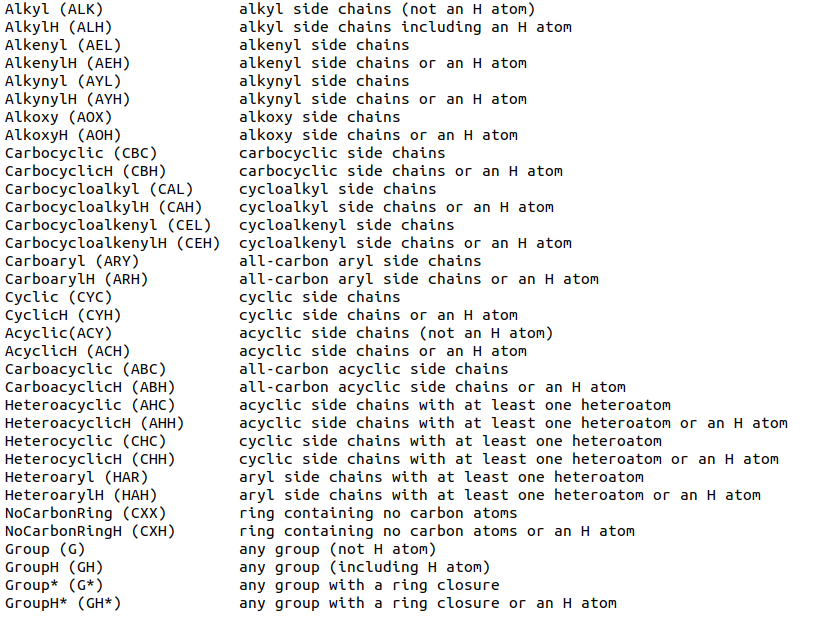



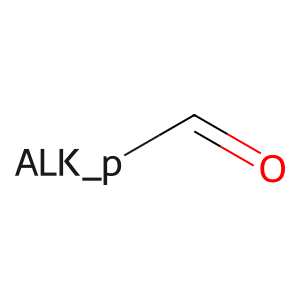

In [29]:
q = Chem.MolFromSmarts('O=C-* |$;;ALK_p$|')
q

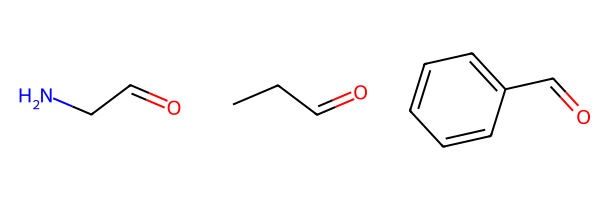

In [30]:
ms = [Chem.MolFromSmiles(x) for x in ('O=CCN','CCC=O','c1ccccc1C=O')]
Draw.MolsToGridImage(ms)

In [31]:
[m.HasSubstructMatch(q) for m in ms]

[True, True, True]

In [32]:
Chem.SetGenericQueriesFromProperties(q)
ps = Chem.SubstructMatchParameters()
ps.useGenericMatchers = True
[m.HasSubstructMatch(q,ps) for m in ms]

[False, True, False]

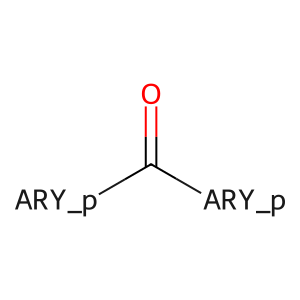

In [33]:
q = Chem.MolFromSmarts('O=C(-*)(-*) |$;;ARY_p;ARY_p$|')
q

In [34]:
Chem.SetGenericQueriesFromProperties(q)
ps = Chem.SubstructMatchParameters()
ps.useGenericMatchers = True
[m.HasSubstructMatch(q,ps) for m in ms]

[False, False, False]

These work with SubstructLibraries too

In [35]:
import pickle
with open('./data/demo_ssslib.pkl','rb') as inf:
    slib = pickle.load(inf)
slib

1000 results


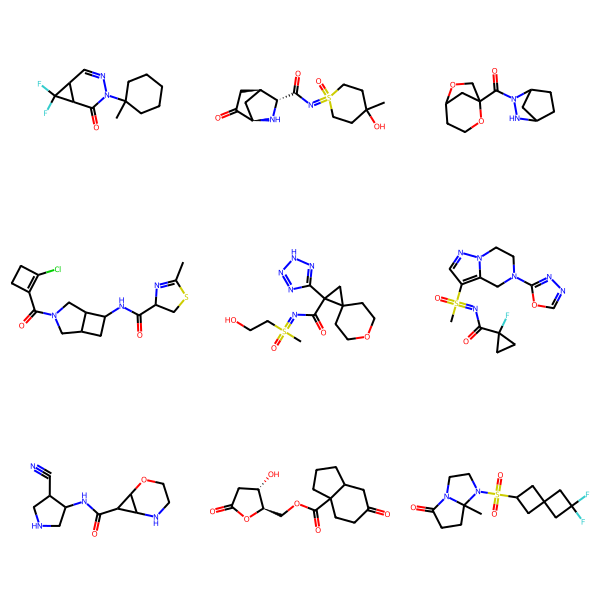

In [36]:
mids = slib.GetMatches(q)
print(f'{len(mids)} results')
ms = [slib.GetMolHolder().GetMol(x) for x in mids[:9]]
Draw.MolsToGridImage(ms)

25 results


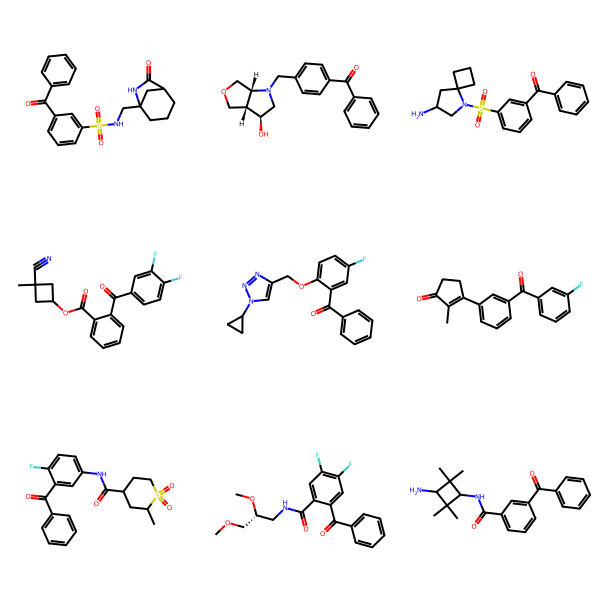

In [37]:
mids = slib.GetMatches(q,ps)
print(f'{len(mids)} results')
ms = [slib.GetMolHolder().GetMol(x) for x in mids[:9]]
Draw.MolsToGridImage(ms)

## Generalized substructure search
(2023.09)

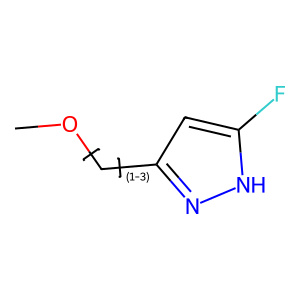

In [38]:
qry = Chem.MolFromSmiles('COCc1n[nH]c(F)c1 |LN:2:1.3|')
qry

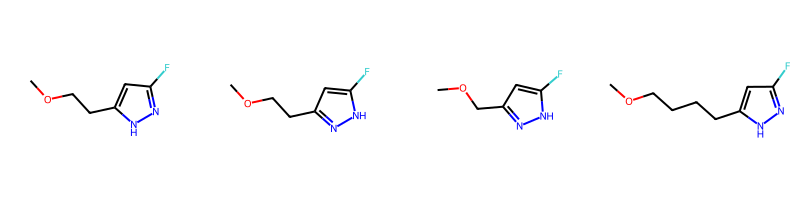

In [39]:
mols = [Chem.MolFromSmiles(smi) for smi in ('COCCc1[nH]nc(F)c1','COCCc1n[nH]c(F)c1','COCc1n[nH]c(F)c1','COCCCCc1[nH]nc(F)c1',)]
Draw.MolsToGridImage(mols,molsPerRow=4)

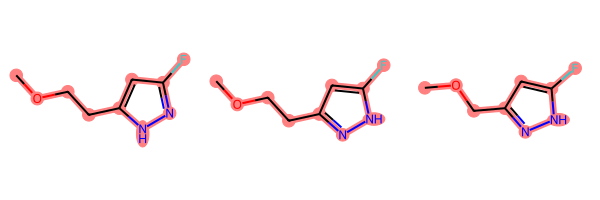

In [40]:
from rdkit.Chem import rdGeneralizedSubstruct
xqm = rdGeneralizedSubstruct.CreateExtendedQueryMol(qry)
matches = [rdGeneralizedSubstruct.MolGetSubstructMatch(m,xqm) for m in mols]
Draw.MolsToGridImage([m for (m,match) in zip(mols,matches) if match],highlightAtomLists = [m for m in matches if m])

## Allowing use of atom and bond properties in the substructure matching
(2023.09)

Developer: Rachel Walker

This provides another way to dynamically control substructure matching.

In [41]:
m = Chem.MolFromSmiles('OCCO')
m2 = Chem.Mol(m)

m.GetAtomWithIdx(0).SetIntProp('match_prop',1)
m2.GetAtomWithIdx(0).SetIntProp('match_prop',1)

ps = Chem.SubstructMatchParameters()
ps.uniquify = False
print(m.GetSubstructMatches(m2,ps))


((0, 1, 2, 3), (3, 2, 1, 0))


In [42]:
ps.atomProperties = ["match_prop"]
m.GetSubstructMatches(m2,ps)

((0, 1, 2, 3),)

We can do the same thing with bonds:

In [43]:
m = Chem.MolFromSmiles('OCCO')
m2 = Chem.Mol(m)

m.GetBondWithIdx(0).SetIntProp('match_prop',1)
m2.GetBondWithIdx(0).SetIntProp('match_prop',1)

ps = Chem.SubstructMatchParameters()
ps.uniquify = False
ps.bondProperties = ["match_prop"]

print(m.GetSubstructMatches(m2,ps))


((0, 1, 2, 3),)


## Improved support for organometallics
(2023.03, 2023.09)

Developer David Cosgrove, funded by Syngenta


In [11]:
from rdkit import Chem
from rdkit.Chem import Draw

In [12]:
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)

### Part 1: adding a cleanup step to convert single bonds between metals and hypervalent atoms to dative bonds.

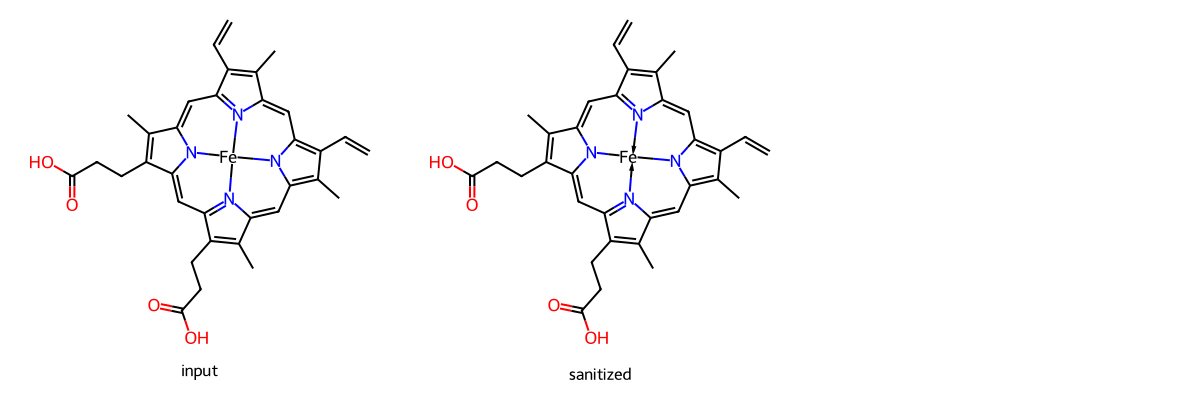

In [19]:
smiles='CC1=C(CCC(O)=O)C2=[N]3C1=Cc1c(C)c(C=C)c4C=C5C(C)=C(C=C)C6=[N]5[Fe]3(n14)n1c(=C6)c(C)c(CCC(O)=O)c1=C2'
m1 = Chem.MolFromSmiles(smiles,
                       sanitize=False)
m2 = Chem.MolFromSmiles(smiles)

m1.UpdatePropertyCache(strict=False)
Draw.MolsToGridImage((m1,m2),subImgSize=(400,400),legends=('input','sanitized'))

You can skip this step if you like by turning it off when you do sanitization:

In [18]:
m1 = Chem.MolFromSmiles(smiles,
                       sanitize=False)
Chem.SanitizeMol(m1,sanitizeOps = Chem.SANITIZE_ALL^Chem.SANITIZE_CLEANUP_ORGANOMETALLICS)

[12:33:10] unrecognized bond type[12:33:10] unrecognized bond type[12:34:20] unrecognized bond type[12:34:20] unrecognized bond type[12:34:46] unrecognized bond type[12:34:46] unrecognized bond type[12:36:12] Explicit valence for atom # 9 N, 4, is greater than permitted


AtomValenceException: Explicit valence for atom # 9 N, 4, is greater than permitted

### Part 2: Switching back and forth between dative and haptic representations

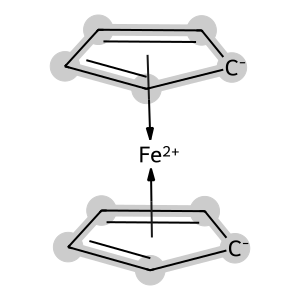

In [73]:
mb = '''ferrocene
     RDKit          2D

  0  0  0  0  0  0  0  0  0  0999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 13 12 0 0 0
M  V30 BEGIN ATOM
M  V30 1 C -34.237900 13.261800 0.000000 0 CHG=-1
M  V30 2 C -35.057400 14.266900 0.000000 0
M  V30 3 C -37.855700 14.284400 0.000000 0
M  V30 4 C -38.759100 13.293300 0.000000 0
M  V30 5 C -36.552000 12.683200 0.000000 0
M  V30 6 C -34.152900 8.363300 0.000000 0 CHG=-1
M  V30 7 C -34.972400 9.368400 0.000000 0
M  V30 8 C -37.770600 9.385900 0.000000 0
M  V30 9 C -38.674100 8.394800 0.000000 0
M  V30 10 C -36.450300 7.767900 0.000000 0
M  V30 11 Fe -36.435100 10.904500 0.000000 0 CHG=2
M  V30 12 * -36.522400 13.604600 0.000000 0
M  V30 13 * -36.404100 8.656100 0.000000 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 9 12 11 ENDPTS=(5 2 3 4 5 1) ATTACH=ALL
M  V30 2 1 1 5
M  V30 3 2 4 5
M  V30 4 1 4 3
M  V30 5 2 2 3
M  V30 6 1 1 2
M  V30 7 1 6 10
M  V30 8 2 9 10
M  V30 9 1 9 8
M  V30 10 2 7 8
M  V30 11 1 6 7
M  V30 12 9 13 11 ENDPTS=(5 7 8 9 10 6) ATTACH=ALL
M  V30 END BOND
M  V30 END CTAB
M  END
$$$$'''
m = Chem.MolFromMolBlock(mb)
m

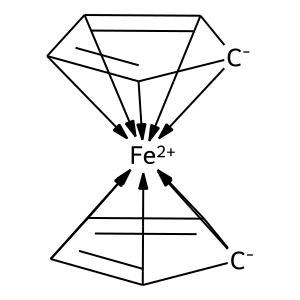

In [74]:
dative_m = Chem.HapticBondsToDative(m)
dative_m

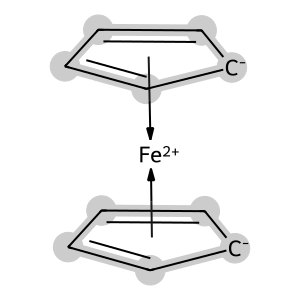

In [75]:
hapt_m = Chem.DativeBondsToHaptic(dative_m)
hapt_m

In [76]:
m.Debug()

[07:58:10] unrecognized bond type[07:58:10] unrecognized bond type[08:21:51] unrecognized bond type[08:21:51] unrecognized bond typeAtoms:
	0 6 C chg: -1  deg: 2 exp: 3 imp: 0 hyb: 3 arom?: 1 chi: 0
	1 6 C chg: 0  deg: 2 exp: 3 imp: 1 hyb: 3 arom?: 1 chi: 0
	2 6 C chg: 0  deg: 2 exp: 3 imp: 1 hyb: 3 arom?: 1 chi: 0
	3 6 C chg: 0  deg: 2 exp: 3 imp: 1 hyb: 3 arom?: 1 chi: 0
	4 6 C chg: 0  deg: 2 exp: 3 imp: 1 hyb: 3 arom?: 1 chi: 0
	5 6 C chg: -1  deg: 2 exp: 3 imp: 0 hyb: 3 arom?: 1 chi: 0
	6 6 C chg: 0  deg: 2 exp: 3 imp: 1 hyb: 3 arom?: 1 chi: 0
	7 6 C chg: 0  deg: 2 exp: 3 imp: 1 hyb: 3 arom?: 1 chi: 0
	8 6 C chg: 0  deg: 2 exp: 3 imp: 1 hyb: 3 arom?: 1 chi: 0
	9 6 C chg: 0  deg: 2 exp: 3 imp: 1 hyb: 3 arom?: 1 chi: 0
	10 26 Fe chg: 2  deg: 2 exp: 2 imp: 0 hyb: 4 arom?: 0 chi: 0
	11 0 * chg: 0  deg: 1 exp: 0 imp: 0 hyb: 0 arom?: 0 chi: 0
	12 0 * chg: 0  deg: 1 exp: 0 imp: 0 hyb: 0 arom?: 0 chi: 0
Bonds:
	0 11->10 order: 17 conj?: 0 aromatic?: 0
	1 0->4 order: 12 conj?: 1 aromatic?: 

In [78]:
hapt_m.UpdatePropertyCache()
hapt_m.Debug()

Atoms:
	0 6 C chg: -1  deg: 2 exp: 3 imp: 0 hyb: 3 arom?: 1 chi: 0
	1 6 C chg: 0  deg: 2 exp: 3 imp: 1 hyb: 3 arom?: 1 chi: 0
	2 6 C chg: 0  deg: 2 exp: 3 imp: 1 hyb: 3 arom?: 1 chi: 0
	3 6 C chg: 0  deg: 2 exp: 3 imp: 1 hyb: 3 arom?: 1 chi: 0
	4 6 C chg: 0  deg: 2 exp: 3 imp: 1 hyb: 3 arom?: 1 chi: 0
	5 6 C chg: -1  deg: 2 exp: 3 imp: 0 hyb: 3 arom?: 1 chi: 0
	6 6 C chg: 0  deg: 2 exp: 3 imp: 1 hyb: 3 arom?: 1 chi: 0
	7 6 C chg: 0  deg: 2 exp: 3 imp: 1 hyb: 3 arom?: 1 chi: 0
	8 6 C chg: 0  deg: 2 exp: 3 imp: 1 hyb: 3 arom?: 1 chi: 0
	9 6 C chg: 0  deg: 2 exp: 3 imp: 1 hyb: 3 arom?: 1 chi: 0
	10 26 Fe chg: 2  deg: 2 exp: 2 imp: 0 hyb: 4 arom?: 0 chi: 0
	11 0 * chg: 0  deg: 1 exp: 0 imp: 0 hyb: 0 arom?: 0 chi: 0
	12 0 * chg: 0  deg: 1 exp: 0 imp: 0 hyb: 0 arom?: 0 chi: 0
Bonds:
	0 0->4 order: 12 conj?: 1 aromatic?: 1
	1 3->4 order: 12 conj?: 1 aromatic?: 1
	2 3->2 order: 12 conj?: 1 aromatic?: 1
	3 1->2 order: 12 conj?: 1 aromatic?: 1
	4 0->1 order: 12 conj?: 1 aromatic?: 1
	5 5->9 orde

### Disconnecting organometallics: sometimes it's better to just fragment the molecule and analyze the ligands and metal separately

In [79]:
from rdkit.Chem.MolStandardize import rdMolStandardize
Chem.MolToSmiles(rdMolStandardize.DisconnectOrganometallics(hapt_m))

[08:22:23] Initializing MetalDisconnector
[08:22:23] Running MetalDisconnector


'[Fe+2].c1cc[cH-]c1.c1cc[cH-]c1'

In [80]:
Chem.MolToSmiles(rdMolStandardize.DisconnectOrganometallics(dative_m))

[08:22:26] Initializing MetalDisconnector
[08:22:26] Running MetalDisconnector
[08:22:26] Removed covalent bond between Fe and C
[08:22:26] Removed covalent bond between Fe and C
[08:22:26] Removed covalent bond between Fe and C
[08:22:26] Removed covalent bond between Fe and C
[08:22:26] Removed covalent bond between Fe and C
[08:22:26] Removed covalent bond between Fe and C
[08:22:26] Removed covalent bond between Fe and C
[08:22:26] Removed covalent bond between Fe and C
[08:22:26] Removed covalent bond between Fe and C
[08:22:26] Removed covalent bond between Fe and C


'[Fe+2].c1cc[cH-]c1.c1cc[cH-]c1'

By the way: you can make the MolStandardize code less verbose:

In [81]:
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.info')
Chem.MolToSmiles(rdMolStandardize.DisconnectOrganometallics(dative_m))

'[Fe+2].c1cc[cH-]c1.c1cc[cH-]c1'

In [82]:
RDLogger.EnableLog('rdApp.info')

## Rascal MCES implementation
(2023.09)

Developer David Cosgrove, funded by Glysade

The Rascal (Rapid Similarity CALculation) algorithm of Raymond et al. is a rapid way of finding Maximum Common Edge Subgraphs, optimised for chemical structures. It finds the bonds that are in common between 2 structures, rather than the more normal matching atoms. The result is usually, but not always, the same. 

Unlike the rdFMCS approach, Rascal:
- can produce a fragmented MCES if relevant.
- only works on pairs of molecules


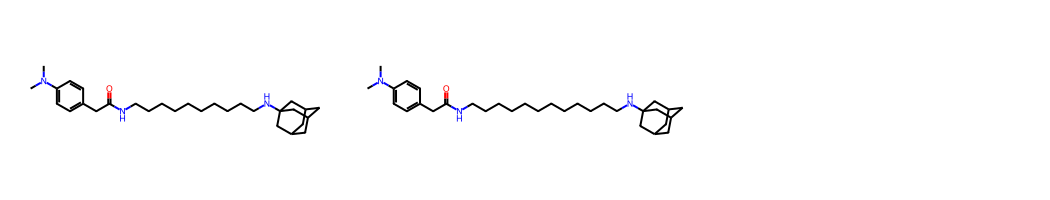

In [86]:
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)

from rdkit.Chem import rdRascalMCES

mol1 = Chem.MolFromSmiles('CN(C)c1ccc(CC(=O)NCCCCCCCCCCNC23CC4CC(C2)CC(C3)C4)cc1')
mol2 = Chem.MolFromSmiles('CN(C)c1ccc(CC(=O)NCCCCCCCCCCCCNC23CC4CC(C2)CC(C3)C4)cc1')
Draw.MolsToGridImage((mol1,mol2),subImgSize=(350,200))

In [87]:
results = rdRascalMCES.FindMCES(mol1, mol2)
res = results[0]
print(f'MCES SMARTS : {res.smartsString}')
print(f'Matching Bonds : {res.bondMatches()}')
print(f'Matching Atoms : {res.atomMatches()}')

MCES SMARTS : CN(-C)-c1:c:c:c(-CC(=O)-NCCCCCCCCCC):c:c:1.NC12CC3CC(-C1)-CC(-C2)-C3
Matching Bonds : [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19), (21, 23), (22, 24), (23, 25), (24, 26), (25, 27), (26, 28), (27, 29), (28, 30), (29, 31), (30, 32), (31, 33), (32, 34), (33, 35), (34, 36), (35, 37), (36, 38)]
Matching Atoms : [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19), (20, 20), (21, 23), (22, 24), (23, 25), (24, 26), (25, 27), (26, 28), (27, 29), (28, 30), (29, 31), (30, 32), (31, 33), (32, 34), (33, 35)]


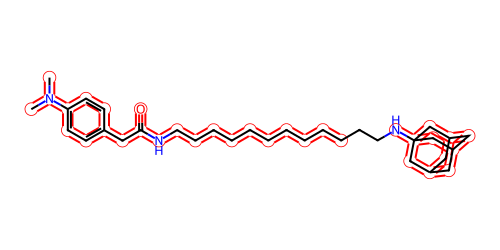

In [88]:
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

def extractHighlights(res):
    bondHighlights1 = {}
    bondHighlights2 = {}
    for bondPair in res.bondMatches():
        bondHighlights1[bondPair[0]] = [(1.0, 0.0, 0.0)]
        bondHighlights2[bondPair[1]] = [(1.0, 0.0, 0.0)]
    atomHighlights1 = {}
    atomHighlights2 = {}
    for atomPair in res.atomMatches():
        atomHighlights1[atomPair[0]] = [(1.0, 0.0, 0.0)]
        atomHighlights2[atomPair[1]] = [(1.0, 0.0, 0.0)]
    return bondHighlights1, bondHighlights2, atomHighlights1, atomHighlights2

def drawMCESMatch(mol1, bondHighlights, atomHighlights):    
    d = rdMolDraw2D.MolDraw2DSVG(500, 250)
    d.drawOptions().fillHighlights = False
    d.drawOptions().multiColourHighlightStyle = Draw.MultiColourHighlightStyle.Lasso
    hRads = {}
    hLwMult = {}
    d.DrawMoleculeWithHighlights(mol1, "", atomHighlights, bondHighlights, hRads, hLwMult, -1)
    d.FinishDrawing()
    return d

bondHighlights1, bondHighlights2, atomHighlights1, atomHighlights2 = extractHighlights(res)
d = drawMCESMatch(mol2, bondHighlights2, atomHighlights2)
SVG(d.GetDrawingText())


### MCES Clustering

In [123]:
from rdkit import RDConfig
import os
from pathlib import Path
cdk2_file = Path(RDConfig.RDContribDir) / 'Fastcluster' / 'cdk2.smi'
suppl = Chem.SmilesMolSupplier(str(cdk2_file), '\t', 1, 0, False)
mols = [mol for mol in suppl]
print(f'{len(mols)} molecules')
clusters = rdRascalMCES.RascalCluster(mols)
print(clusters)

47 molecules
[[3, 4, 1, 2, 0, 28, 29], [25, 26, 38, 24, 46, 39, 27], [6, 34, 35, 7, 5, 44], [36, 44], [13, 14], [19, 20], [21, 22], [16, 18, 17, 10, 23, 32, 30, 15, 33, 31, 9, 37, 42, 12, 11, 8, 40, 41, 43, 45]]


In [124]:
import ipywidgets as widgets
from ipywidgets import interact,fixed
from IPython.display import SVG,Image

@interact(whichCluster=range(len(clusters)))
def showCluster(whichCluster):
    return Draw.MolsToGridImage([mols[x] for x in clusters[whichCluster]],molsPerRow=4)

interactive(children=(Dropdown(description='whichCluster', options=(0, 1, 2, 3, 4, 5, 6, 7), value=0), Output(…

In [125]:
%timeit clusters = rdRascalMCES.RascalCluster(mols)

80.2 ms ± 299 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [126]:
clusters = rdRascalMCES.RascalButinaCluster(mols)
print(clusters)

[[25, 26, 38, 24, 27, 46], [6, 34, 5, 35, 44, 7], [4, 3, 1, 2, 0, 28], [22, 21], [20, 19], [14, 13], [45], [43], [42], [41], [40], [39], [37], [36], [33], [32], [31], [30], [29], [23], [18], [17], [16], [15], [12], [11], [10], [9], [8]]


In [127]:
import ipywidgets as widgets
from ipywidgets import interact,fixed
from IPython.display import SVG,Image

@interact(whichCluster=range(len(clusters)))
def showCluster(whichCluster):
    return Draw.MolsToGridImage([mols[x] for x in clusters[whichCluster]],molsPerRow=4)

interactive(children=(Dropdown(description='whichCluster', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, …

In [128]:
%timeit clusters = rdRascalMCES.RascalCluster(mols)

80.2 ms ± 235 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Morgan fingerprints can now be generated with redundant environments

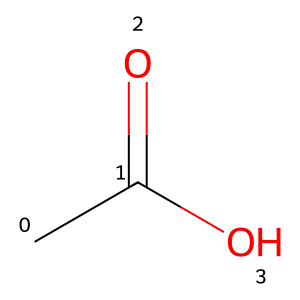

In [56]:
m = Chem.MolFromSmiles('CC(=O)O')

IPythonConsole.drawOptions.addAtomIndices = True
m

In [57]:
IPythonConsole.drawOptions.addAtomIndices = False


In [58]:
from rdkit.Chem import rdFingerprintGenerator


mfpgen1 = rdFingerprintGenerator.GetMorganGenerator(radius=2)
ao = rdFingerprintGenerator.AdditionalOutput()
ao.AllocateBitInfoMap()

fp = mfpgen1.GetSparseCountFingerprint(m,additionalOutput=ao)
print(ao.GetBitInfoMap())


{864662311: ((3, 0),), 864942730: ((2, 0),), 1510328189: ((2, 1),), 1533864325: ((3, 1),), 2205501948: ((1, 1),), 2246699815: ((1, 0),), 2246728737: ((0, 0),), 3545365497: ((0, 1),)}


In [59]:
mfpgen2 = rdFingerprintGenerator.GetMorganGenerator(radius=2, includeRedundantEnvironments=True)

fp = mfpgen2.GetSparseCountFingerprint(m,additionalOutput=ao)
print(ao.GetBitInfoMap())


{397199613: ((0, 2),), 864662311: ((3, 0),), 864942730: ((2, 0),), 1510328189: ((2, 1),), 1533864325: ((3, 1),), 2000926734: ((3, 2),), 2205501948: ((1, 1),), 2246699815: ((1, 0),), 2246728737: ((0, 0),), 2963005983: ((1, 2),), 3438858329: ((2, 2),), 3545365497: ((0, 1),)}


## xyz2mol integration
(2022.09)

Developer Sreya Gogineni, GSoC 2022 project

In [2]:
!cat ./data/dsgdb9nsd_107313.xyz

19
gdb 107313	2.67642	1.59305	1.14971	3.3443	81.12	-0.2359	-0.0506	0.1853	1106.1507	0.159794	-385.918216	-385.909962	-385.909018	-385.950934	31.892	
C	 0.0645055554	 1.4843171326	 0.3723315122	-0.379845
C	-0.001915467	 0.0516984051	-0.1729357038	-0.277772
C	-1.4001624807	-0.5304376801	-0.1487075838	 0.233551
C	-1.9909553844	-1.0379429662	 1.1601625215	-0.307513
C	-1.7182271444	-1.9962888369	 0.0152208454	-0.158294
C	-2.905416575	-2.2627721735	-0.8489696604	-0.065615
C	-3.3347497536	-1.1525477782	-1.4661914556	-0.191532
C	-2.4353480328	-0.0114763902	-1.1388331005	 0.336742
O	-2.4853518918	 1.1093228549	-1.595794586	-0.340877
H	 1.0876615149	 1.8699729825	 0.3263064541	 0.106173
H	-0.5836533924	 2.142053447	-0.2101812431	 0.152698
H	-0.2626541721	 1.5210712578	 1.4170099662	 0.108877
H	 0.3710335675	 0.0343653078	-1.2041622283	 0.107526
H	 0.662791197	-0.6008609283	 0.4071642198	 0.091428
H	-1.3142481944	-1.0584396879	 2.0096409673	 0.122076
H	-3.0252533013	-0.8199288984	 1.4038330438	 0

In [3]:
# the XYZ files from QM9 aren't really XYZ... clean them up:
def cleanup_qm9_xyz(fname):
    ind = open(fname).readlines()
    nAts = int(ind[0])
    smi = ind[-2].split()[-1]
    ind[1] = '\n'
    ind = ind[:nAts+2]
    for i in range(2,nAts+2):
        l = ind[i]
        l = l.split('\t')
        l.pop(-1)
        ind[i] = '\t'.join(l)+'\n'
    ind = ''.join(ind)
    return ind,smi

In [4]:
ind,smi = cleanup_qm9_xyz('./data/dsgdb9nsd_107313.xyz')
print(ind)

19

C	 0.0645055554	 1.4843171326	 0.3723315122
C	-0.001915467	 0.0516984051	-0.1729357038
C	-1.4001624807	-0.5304376801	-0.1487075838
C	-1.9909553844	-1.0379429662	 1.1601625215
C	-1.7182271444	-1.9962888369	 0.0152208454
C	-2.905416575	-2.2627721735	-0.8489696604
C	-3.3347497536	-1.1525477782	-1.4661914556
C	-2.4353480328	-0.0114763902	-1.1388331005
O	-2.4853518918	 1.1093228549	-1.595794586
H	 1.0876615149	 1.8699729825	 0.3263064541
H	-0.5836533924	 2.142053447	-0.2101812431
H	-0.2626541721	 1.5210712578	 1.4170099662
H	 0.3710335675	 0.0343653078	-1.2041622283
H	 0.662791197	-0.6008609283	 0.4071642198
H	-1.3142481944	-1.0584396879	 2.0096409673
H	-3.0252533013	-0.8199288984	 1.4038330438
H	-0.9412329872	-2.7436632889	 0.1278385726
H	-3.37329736	-3.2394582332	-0.9072563749
H	-4.2004762777	-1.0463782959	-2.1061677066



In [5]:
IPythonConsole.ipython_3d = True
raw_mol = Chem.MolFromXYZBlock(ind)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

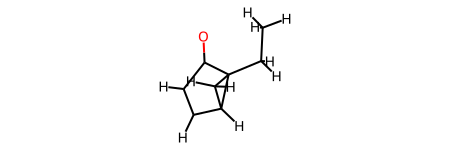

In [6]:
from rdkit.Chem import rdDetermineBonds
conn_mol = Chem.Mol(raw_mol)
rdDetermineBonds.DetermineConnectivity(conn_mol)
conn_mol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

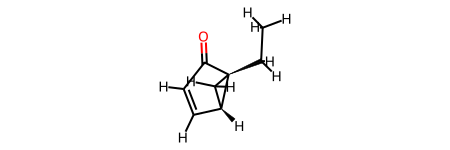

In [7]:
bond_moll = Chem.Mol(raw_mol)
rdDetermineBonds.DetermineBonds(bond_moll,charge=0)
bond_moll

In [8]:
print(Chem.MolToSmiles(Chem.RemoveHs(bond_moll)))
print(Chem.CanonSmiles(smi))

CC[C@]12C[C@H]1C=CC2=O
CC[C@]12C[C@H]1C=CC2=O


In [9]:
ind,smi = cleanup_qm9_xyz('./data/dsgdb9nsd_127185.xyz')
print(ind)

15

C	 0.0343546019	 1.4639396412	-0.0144520966
N	-0.0018739742	 0.0062875584	-0.0044099801
C	-0.0457696794	-0.6642298904	 1.2086465826
O	-0.0565161874	-0.1089919849	 2.28244531
C	 0.0083539541	-0.6841610686	-1.2118312396
N	-0.0233437319	-2.0013900353	-1.2648642138
O	-0.0002281464	-2.314369194	-2.6220230127
C	 0.0441188079	-1.183798074	-3.3313825838
C	 0.0525841108	-0.1011404452	-2.5152711708
H	 0.9466596103	 1.8281913111	-0.4975049341
H	-0.8358831816	 1.8721866674	-0.5382185074
H	 0.0186904	 1.7899970035	 1.0243575247
H	-0.0698703346	-1.7553522141	 1.0774626862
H	 0.0656421551	-1.2995764425	-4.4039746324
H	 0.0848079256	 0.9381598974	-2.7901810822



CN(C=O)c1ccon1
CN(C=O)c1ccon1


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

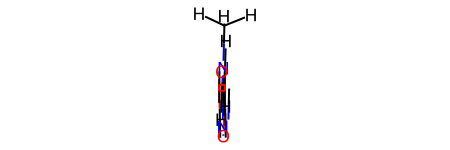

In [10]:
raw_mol = Chem.MolFromXYZBlock(ind)
bond_moll = Chem.Mol(raw_mol)
rdDetermineBonds.DetermineBonds(bond_moll,charge=0)
print(Chem.MolToSmiles(Chem.RemoveHs(bond_moll)))
print(Chem.CanonSmiles(smi))
bond_moll

## Initial support for non-tetrahedral stereochemistry
(2022.09 release)

There's more information on this in the RDKit Book.

With the 2022.09 release of the RDKit we have started to add support for non-tetrahedral stereochemistry.
The three non-tetrahedral coordination types supported are: square planar, trigonal bipyramidal, and octahedral.
There's still a lot of work left to do, but this is a real start.

The functionality which is currently supported includes:
- Parsing SMILES
- Perceiving stereo from 2D or 3D
- Generating non-canonical SMILES


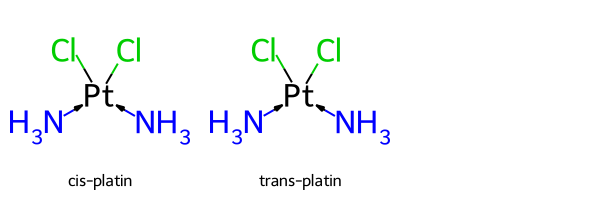

In [83]:
cis_plati = Chem.MolFromSmiles('Cl[Pt@SP1](Cl)(<-[NH3])<-[NH3]')
trans_plati = Chem.MolFromSmiles('Cl[Pt@SP2](Cl)(<-[NH3])<-[NH3]')
Draw.MolsToGridImage([cis_plati,trans_plati],legends=['cis-platin','trans-platin'])

[08:22:46] unrecognized bond type[08:22:46] unrecognized bond type[08:22:46] unrecognized bond type[08:22:46] unrecognized bond type[08:22:47] UFFTYPER: Unrecognized atom type: N_5 (3)
[08:22:47] UFFTYPER: Unrecognized atom type: N_5 (4)


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

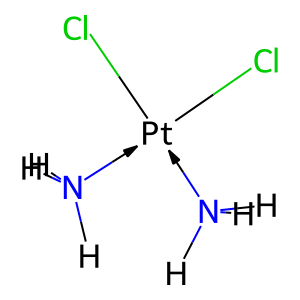

In [84]:
IPythonConsole.ipython_3d = True
from rdkit.Chem import rdDistGeom
ch = Chem.AddHs(cis_plati)
th = Chem.AddHs(trans_plati)
rdDistGeom.EmbedMolecule(ch)
ch

[08:22:48] UFFTYPER: Unrecognized atom type: N_5 (3)
[08:22:48] UFFTYPER: Unrecognized atom type: N_5 (4)


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

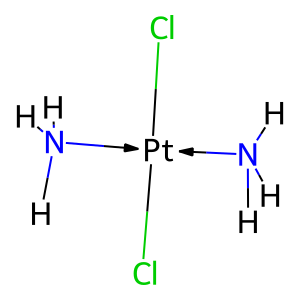

In [85]:
rdDistGeom.EmbedMolecule(th)
th

## Using ring system templates in 2D Coordinate Generation
(2023.03)

Developer: Rachel Walker


Beginning in the 2023.03.1 release, it is possible to use ring system templates when generating 2D coordinates to improve the depiction of some complicated ring systems and macrocycles. There are currently around 70 pre-existing templates, but you are also able to define and use custom templates. The current templates are sourced from [coordgenlibs](https://github.com/schrodinger/coordgenlibs).

You can use the default ring system templates by setting `useRingTemplates` to `True` in `rdDepictor.Compute2DCoords`

In [11]:
from rdkit import Chem
from rdkit.Chem import rdDepictor
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

IPythonConsole.ipython_useSVG=True
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


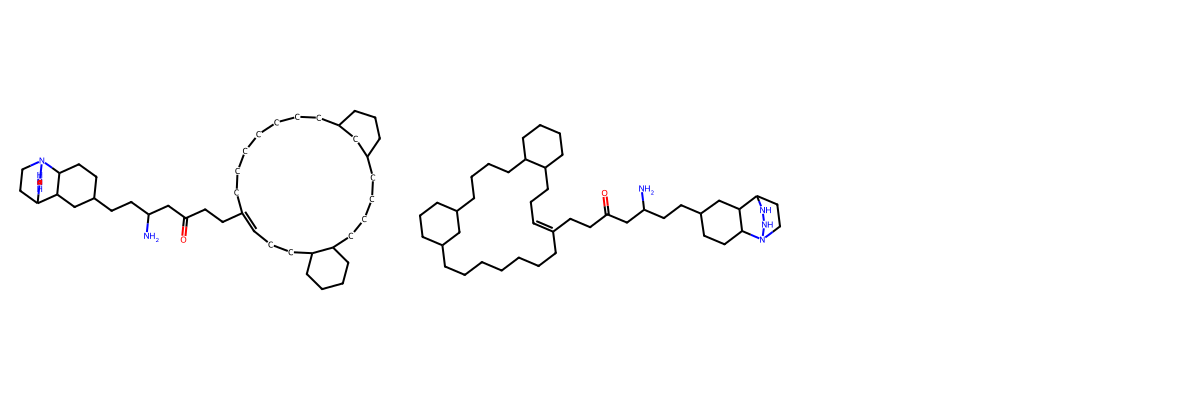

In [12]:
mol = Chem.MolFromSmiles("NC(CCC1CCC2C(C1)C1CCN2NN1)CC(=O)CCC1=CCCC2CCCCC2CCCCC2CCCC(CCCCCCC1)C2")
mol_with_templates = Chem.Mol(mol)

# use rdkit native coordinate generation
rdDepictor.SetPreferCoordGen(False)
rdDepictor.Compute2DCoords(mol)

# the first time you call this, 
rdDepictor.Compute2DCoords(mol_with_templates, useRingTemplates=True)

Draw.MolsToGridImage([mol, mol_with_templates], subImgSize=(400,400))

### Example uses of default templates

Templates can be used for common, complex ring systems that the standard 2D coordinate generation algorithm distorts. They are also useful if you want certain ring systems to be laid out in a specific way (for example, cubane).

#### Templates by themselves

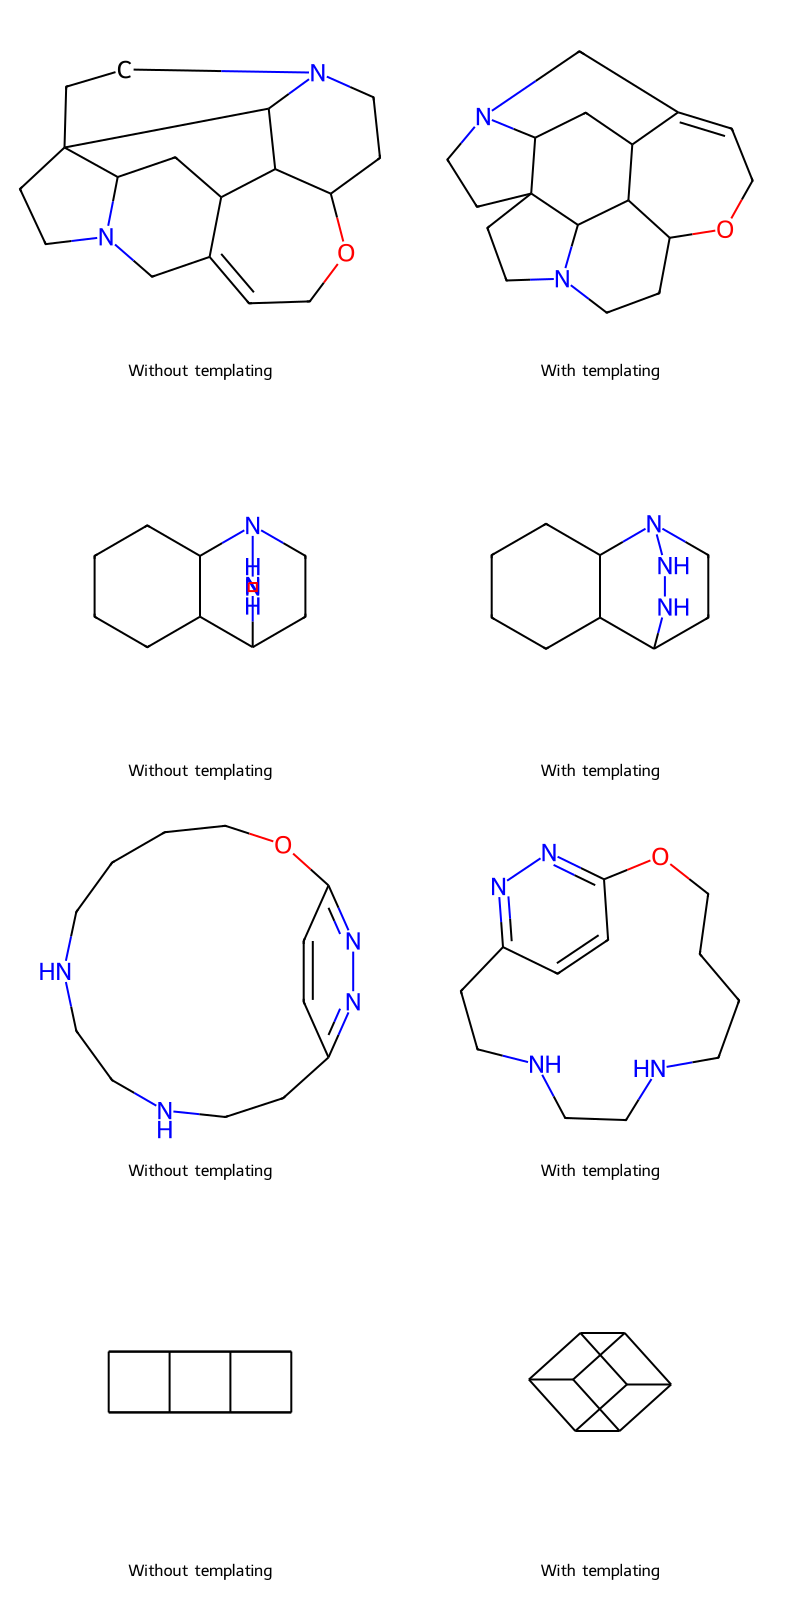

In [13]:
mols = [Chem.MolFromSmiles("C1=C2CN3CCC45CCN6CCC(OC1)C(C2CC34)C65"),
        Chem.MolFromSmiles("C1CCC2C(C1)C1CCN2NN1"),
        Chem.MolFromSmiles("c1cc2nnc1CCNCCNCCCCO2"),
        Chem.MolFromSmiles("C12C3C4C1C1C2C3C41")]
mols_with_templates = [Chem.Mol(m) for m in mols]

legends = []
allmols = []
for m, m_with_t in zip(mols, mols_with_templates):
    rdDepictor.Compute2DCoords(m, useRingTemplates=False)
    rdDepictor.Compute2DCoords(m_with_t, useRingTemplates=True)
    allmols.append(m)
    allmols.append(m_with_t)
    legends.append("Without templating")
    legends.append("With templating")
    
Draw.MolsToGridImage(allmols, legends=legends, molsPerRow=2, subImgSize=(400,400))

#### Template matches within a larger structure

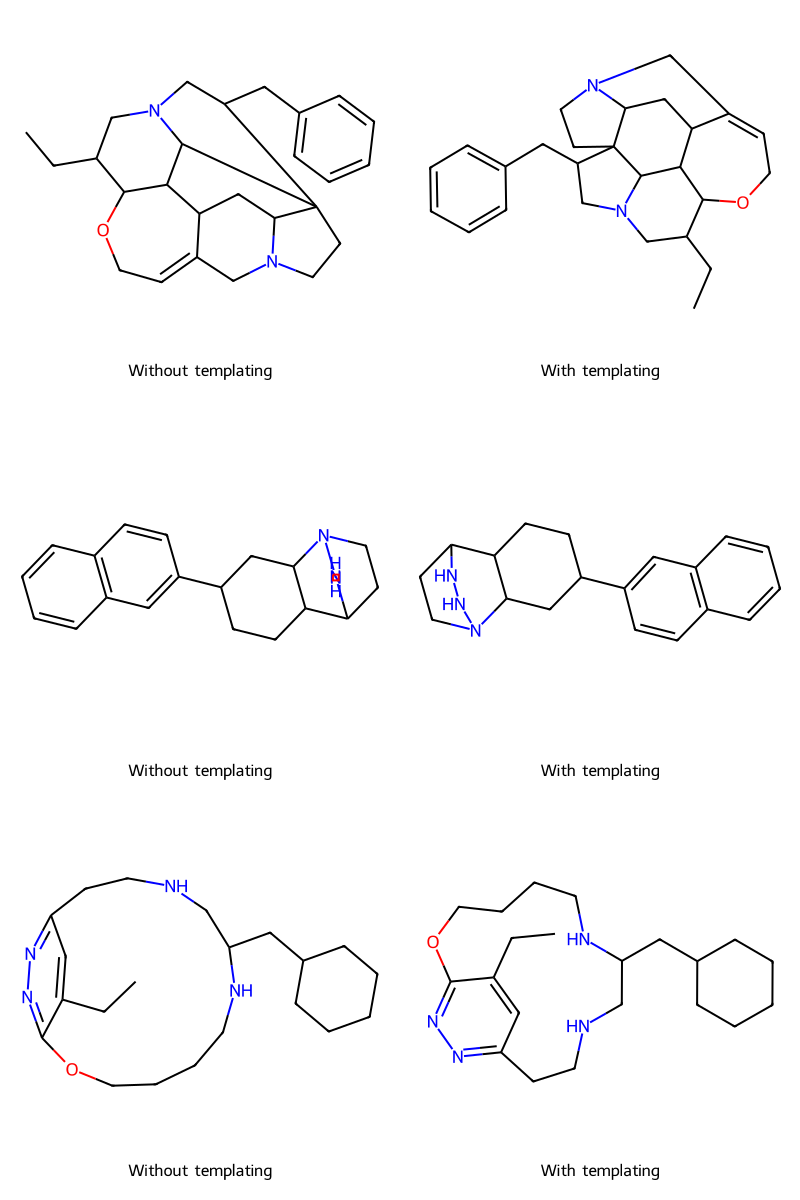

In [14]:
mols = [Chem.MolFromSmiles("CCC1CN2CC(CC3=CC=CC=C3)C34CCN5CC6=CCOC1C(C23)C6CC45"),
        Chem.MolFromSmiles("C1CC2C3CCN(NN3)C2CC1C1=CC2=C(C=CC=C2)C=C1"),
        Chem.MolFromSmiles("CCc1cc2CCNCC(CC3CCCCC3)NCCCCOc1nn2")]
mols_with_templates = [Chem.Mol(m) for m in mols]

legends = []
allmols = []
for m, m_with_t in zip(mols, mols_with_templates):
    rdDepictor.Compute2DCoords(m, useRingTemplates=False)
    rdDepictor.Compute2DCoords(m_with_t, useRingTemplates=True)
    allmols.append(m)
    legends.append("Without templating")
    allmols.append(m_with_t)
    legends.append("With templating")
    
Draw.MolsToGridImage(allmols, legends=legends, molsPerRow=2, subImgSize=(400,400))

#### Multiple template matches in a single structure

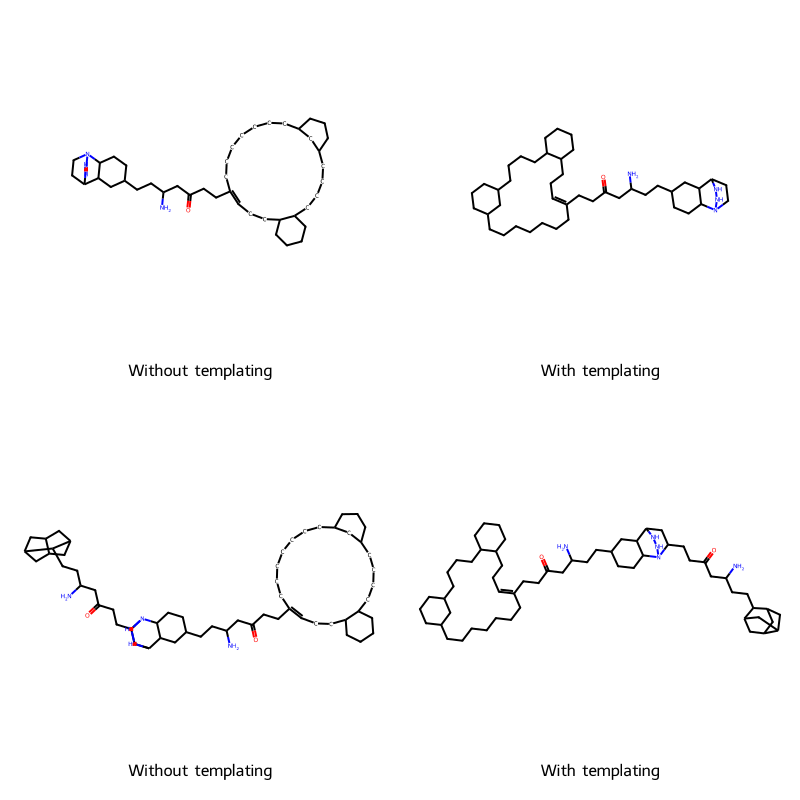

In [15]:
m1 = Chem.MolFromSmiles("NC(CCC1CCC2C(C1)C1CCN2NN1)CC(=O)CCC1=CCCC2CCCCC2CCCCC2CCCC(CCCCCCC1)C2")
m2 = Chem.MolFromSmiles("NC(CCC1CCC2C(C1)C1CC(CCC(=O)CC(N)CCC3C4CC5CC3CC5C4)N2NN1)CC(=O)CCC1=CCCC2CCCCC2CCCCC2CCCC(CCCCCCC1)C2")
m1_templates = Chem.Mol(m1)
m2_templates = Chem.Mol(m2)

rdDepictor.Compute2DCoords(m1, useRingTemplates=False)
rdDepictor.Compute2DCoords(m2, useRingTemplates=False)
rdDepictor.Compute2DCoords(m1_templates, useRingTemplates=True)
rdDepictor.Compute2DCoords(m2_templates, useRingTemplates=True)

Draw.MolsToGridImage([m1, m1_templates, m2, m2_templates], legends=['Without templating', 'With templating', 'Without templating', 'With templating'], molsPerRow=2, subImgSize=(400,400))

### Setting custom templates

You can set your own templates using `rdDepictor.SetRingSystemTemplates`. This will replace all of the default templates, while `rdDepictor.AddRingSystemTemplates` will add to any templates that are already present (the most recently added templates will be given preference). 

Custom templates should be defined in a .smi file, with each line representing a single template using CXSMILES. Templates must be a connected graph (no fragments) and have 2D coordinates defined, and they need to consist of a single ring or fused ring system (spiros are OK).

Example: I made `my_templates.smi` with a single template:

C1CC2CCOC3OC4CCC(C1)C23OO4 |(-0.5537,-3.1595,;-1.6057,-2.003,;-1.4262,-0.4072,;-2.9804,0.0271,;-3.5191,1.502,;-2.2028,2.3562,;-0.6818,1.8511,;1.0592,1.4391,;2.6123,1.8366,;3.5191,0.5341,;2.6067,-0.7521,;1.0061,-0.773,;0.7888,-2.3546,;-0.0405,0.5251,;0.4049,2.3,;1.7604,3.1594,)|

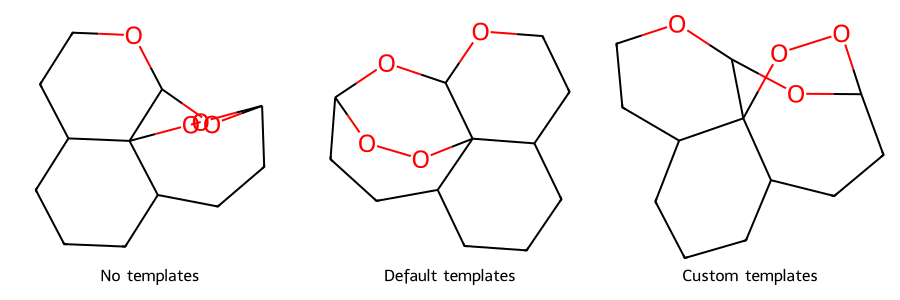

In [16]:
m = Chem.MolFromSmiles("C1CC2CCOC3OC4CCC(C1)C23OO4")
m_default_templates = Chem.Mol(m)
m_custom_templates = Chem.Mol(m)

rdDepictor.Compute2DCoords(m, useRingTemplates=False)
rdDepictor.Compute2DCoords(m_default_templates, useRingTemplates=True)

# Set ring system templates
rdDepictor.SetRingSystemTemplates("data/my_templates.smi")
rdDepictor.Compute2DCoords(m_custom_templates, useRingTemplates=True)

Draw.MolsToGridImage([m, m_default_templates, m_custom_templates], legends=['No templates', 'Default templates', 'Custom templates'], molsPerRow=3, subImgSize=(300,300))

You can set the templates back to the original ones by calling `LoadDefaultRingSystemTemplates`

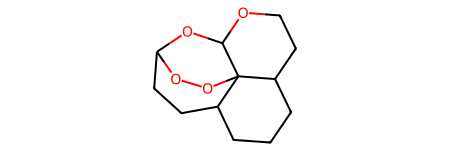

In [17]:
rdDepictor.LoadDefaultRingSystemTemplates()
rdDepictor.Compute2DCoords(m, useRingTemplates=True)
m

### Limitations

As of this release, there are several limitations to the templating that we plan on addressing in the future:

1. Only ring system templates are supported, it would be nice to be able to template some complicated stereochemistry
2. Template matching only considers the first substructure match, even when other matches would result in better depictions
3. Quality and quantity of templates could be vastly improved, we still don't have a wide variety of macrocycles and the existing templates are specific bond order and atom type

Example where #2 would be helpful:

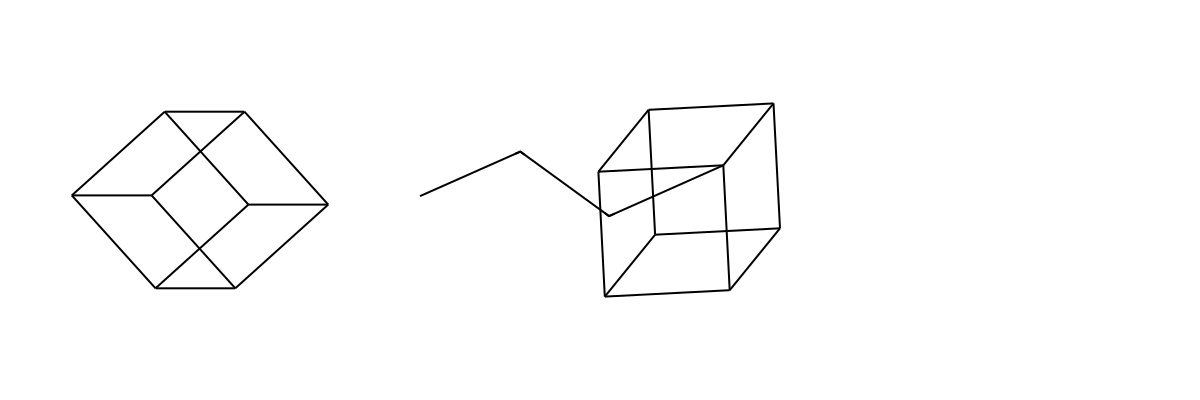

In [18]:
cubane = Chem.MolFromSmiles("C12C3C4C1C1C2C3C41")
cubane_with_path = Chem.MolFromSmiles("CCCC12C3C4C5C3C1C5C24")

rdDepictor.Compute2DCoords(cubane, useRingTemplates=True)
rdDepictor.Compute2DCoords(cubane_with_path, useRingTemplates=True)

Draw.MolsToGridImage([cubane, cubane_with_path], subImgSize=(400,400))

### How to contribute templates using the molecular_templates repo!

There is a new repository on github that we will use to collect and store templates here https://github.com/rdkit/molecular_templates. You can contribute ring system template(s) by opening a PR and adding your templates in CXSMILES format to the `templates.smi` file. More details can be found in the README file on Github.

You can view all of the current templates (which are sourced from coordgenlibs, Schrodinger's 2D coordinate generation software) in the gallery: https://github.com/rdkit/molecular_templates/blob/main/gallery.md 

Ricardo set up some awesome Github actions so that we can visualize the template you suggest in your pull request! Here is an example: https://github.com/rdkit/molecular_templates/pull/7